# DAA Group 2 Internal Project (ML)

## Chew and Isabel - Data Engineering

### Import Libraries

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('HDB_Resale_Prices.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194170 entries, 0 to 194169
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                194170 non-null  object 
 1   town                 194170 non-null  object 
 2   flat_type            194170 non-null  object 
 3   block                194170 non-null  object 
 4   street_name          194170 non-null  object 
 5   storey_range         194170 non-null  object 
 6   floor_area_sqm       194170 non-null  float64
 7   flat_model           194170 non-null  object 
 8   lease_commence_date  194170 non-null  int64  
 9   remaining_lease      194170 non-null  object 
 10  resale_price         194170 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 16.3+ MB


### Basic Cleaning

In [11]:
# Basic Cleaning - Remove duplicates from the dataset
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193876 entries, 0 to 194169
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                193876 non-null  object 
 1   town                 193876 non-null  object 
 2   flat_type            193876 non-null  object 
 3   block                193876 non-null  object 
 4   street_name          193876 non-null  object 
 5   storey_range         193876 non-null  object 
 6   floor_area_sqm       193876 non-null  float64
 7   flat_model           193876 non-null  object 
 8   lease_commence_date  193876 non-null  int64  
 9   remaining_lease      193876 non-null  object 
 10  resale_price         193876 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 17.7+ MB


### Data Formatting

In [12]:
# Convert month to datetime
df["month"] = pd.to_datetime(df["month"])
df["year"] = df["month"].dt.year
df["quarter"] = df["month"].dt.quarter

In [13]:
# Convert storey_range to storey_avg
df[["storey_min", "storey_max"]] = (
    df["storey_range"].str.split(" TO ", expand=True).astype(int)
)
df["storey_avg"] = (df["storey_min"] + df["storey_max"]) / 2
df = df.drop(columns=["storey_range", "storey_min", "storey_max"])

In [14]:
# Calculate lease age
df["lease_age"] = df["year"] - df["lease_commence_date"] # Calculate lease age
df = df.drop(columns=["lease_commence_date"]) # Drop original lease_commence_date column 

In [15]:
# Converting 'remaining_lease' to numerical values
df["remaining_lease"] = df["remaining_lease"].str.lower().str.strip() #Standardise text
years = df["remaining_lease"].str.extract(r"(\d+)\s*year").astype(float) # Extract years
months = df["remaining_lease"].str.extract(r"(\d+)\s*month").fillna(0).astype(float) # Extract months, fill NaN with 0
df["remaining_lease_years"] = years + months / 12 # Convert total to years

In [16]:
df.head()

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,remaining_lease,resale_price,year,quarter,storey_avg,lease_age,remaining_lease_years
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,44.0,Improved,61 years 04 months,232000.0,2017,1,11.0,38,61.333333
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,67.0,New Generation,60 years 07 months,250000.0,2017,1,2.0,39,60.583333
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,67.0,New Generation,62 years 05 months,262000.0,2017,1,2.0,37,62.416667
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,68.0,New Generation,62 years 01 month,265000.0,2017,1,5.0,37,62.083333
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,67.0,New Generation,62 years 05 months,265000.0,2017,1,2.0,37,62.416667


### Checking Features for any Outliers

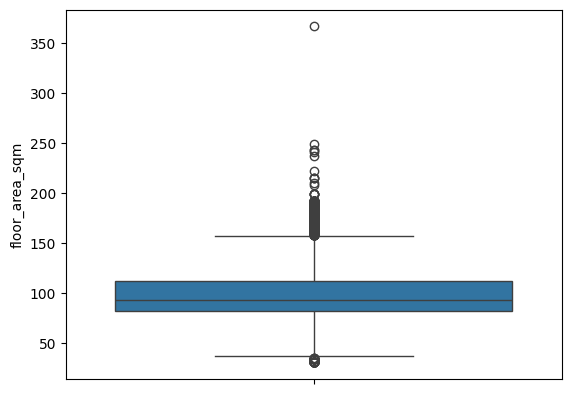

In [17]:
# Check for outliers in floor_area_sqm
sns.boxplot(y=df["floor_area_sqm"])
plt.show()

In [18]:
# Remove outliers in floor_area_sqm
df = df[df["floor_area_sqm"] <= 350]

### Final Check

In [19]:
df.head()

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,remaining_lease,resale_price,year,quarter,storey_avg,lease_age,remaining_lease_years
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,44.0,Improved,61 years 04 months,232000.0,2017,1,11.0,38,61.333333
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,67.0,New Generation,60 years 07 months,250000.0,2017,1,2.0,39,60.583333
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,67.0,New Generation,62 years 05 months,262000.0,2017,1,2.0,37,62.416667
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,68.0,New Generation,62 years 01 month,265000.0,2017,1,5.0,37,62.083333
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,67.0,New Generation,62 years 05 months,265000.0,2017,1,2.0,37,62.416667


In [20]:
df.to_csv('HDB_Resale_Prices_Data_Engineered.csv', index=False)

## Mabel - Pre ML EDA

### Read Data Engineered CSV File

In [21]:
df = pd.read_csv("HDB_Resale_Prices_Data_Engineered.csv")
df.head()

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,remaining_lease,resale_price,year,quarter,storey_avg,lease_age,remaining_lease_years
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,44.0,Improved,61 years 04 months,232000.0,2017,1,11.0,38,61.333333
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,67.0,New Generation,60 years 07 months,250000.0,2017,1,2.0,39,60.583333
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,67.0,New Generation,62 years 05 months,262000.0,2017,1,2.0,37,62.416667
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,68.0,New Generation,62 years 01 month,265000.0,2017,1,5.0,37,62.083333
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,67.0,New Generation,62 years 05 months,265000.0,2017,1,2.0,37,62.416667


In [22]:
df.shape

(193875, 14)

### Understanding Distribution of Prices, Lease Age, Floor 

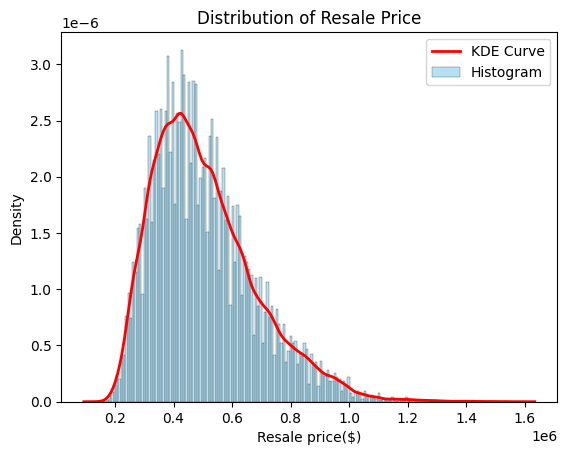

In [23]:
# Resale price distribution

sns.histplot(
    df['resale_price'],
    bins='fd',
    stat='density',
    color='skyblue',
    alpha=0.6,
    label='Histogram'
)

sns.kdeplot(
    df['resale_price'],
    color='red',
    linewidth=2,
    label='KDE Curve'
)

plt.legend()
plt.title('Distribution of Resale Price')
plt.xlabel('Resale price($)')
plt.ylabel('Density')
plt.show()

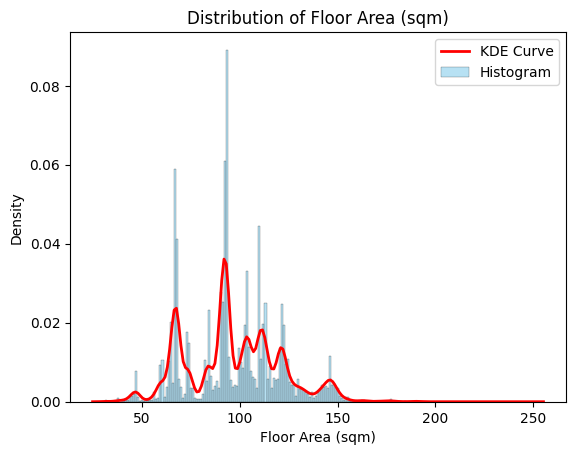

In [24]:
# Floor area distribution

sns.histplot(
    df['floor_area_sqm'],
    bins='fd',       
    stat='density',
    color='skyblue',
    alpha=0.6,
    label='Histogram'
)

sns.kdeplot(
    df['floor_area_sqm'],
    color='red',
    linewidth=2,
    label='KDE Curve'
)

plt.legend()
plt.title('Distribution of Floor Area (sqm)')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Density')
plt.show()

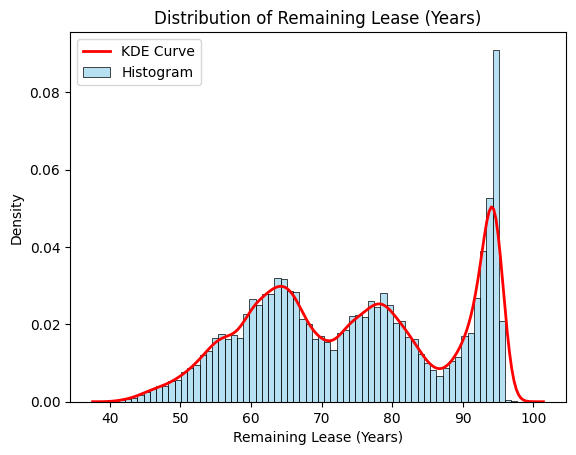

In [25]:
# Remaining lease distribution

sns.histplot(
    df['remaining_lease_years'],
    bins='fd',
    stat='density',
    color='skyblue',
    alpha=0.6,
    label='Histogram'
)

sns.kdeplot(
    df['remaining_lease_years'],
    color='red',
    linewidth=2,
    label='KDE Curve'
)

plt.legend()
plt.title('Distribution of Remaining Lease (Years)')
plt.xlabel('Remaining Lease (Years)')
plt.ylabel('Density')
plt.show()

### Analysis of Structural Attributes and Locational Factors Affecting Resale Price

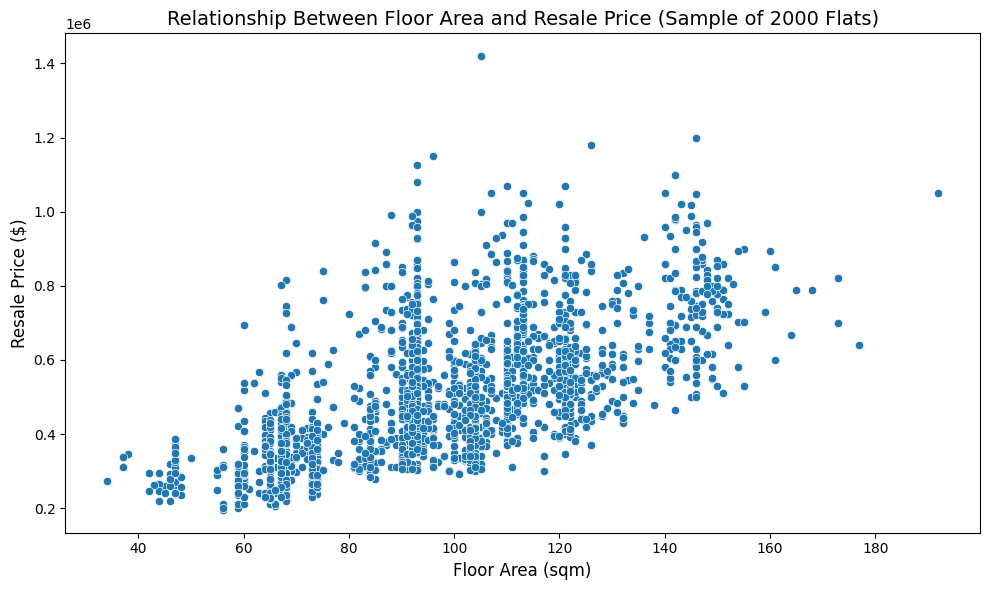

In [26]:
# Price vs Floor area

sample_df = df.sample(n=2000, random_state=42)
plt.figure(figsize=(10,6))
sns.scatterplot(x='floor_area_sqm', y='resale_price', data=sample_df)
plt.title("Relationship Between Floor Area and Resale Price (Sample of 2000 Flats)", fontsize=14)
plt.xlabel("Floor Area (sqm)", fontsize=12)
plt.ylabel("Resale Price ($)", fontsize=12)
plt.tight_layout()
plt.show()

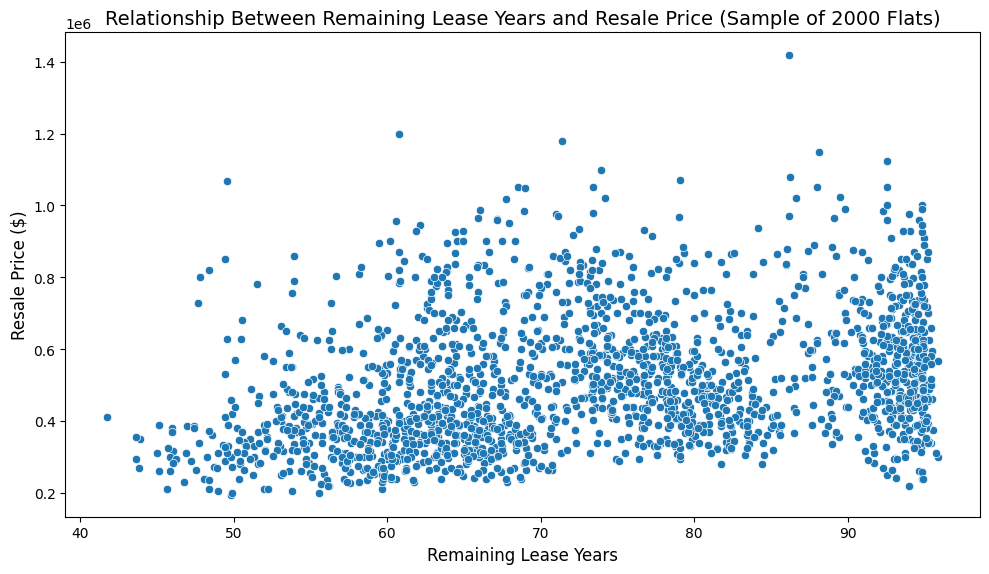

In [27]:
# Price vs remaining lease

sample_df = df.sample(n=2000, random_state=42)
plt.figure(figsize=(10,6))
sns.scatterplot(x='remaining_lease_years', y='resale_price', data=sample_df)
plt.title("Relationship Between Remaining Lease Years and Resale Price (Sample of 2000 Flats)", fontsize=14)
plt.xlabel("Remaining Lease Years", fontsize=12)
plt.ylabel("Resale Price ($)", fontsize=12)
plt.tight_layout()
plt.show()

### Effect of Flat Type, Storey, and Town on Price Variation

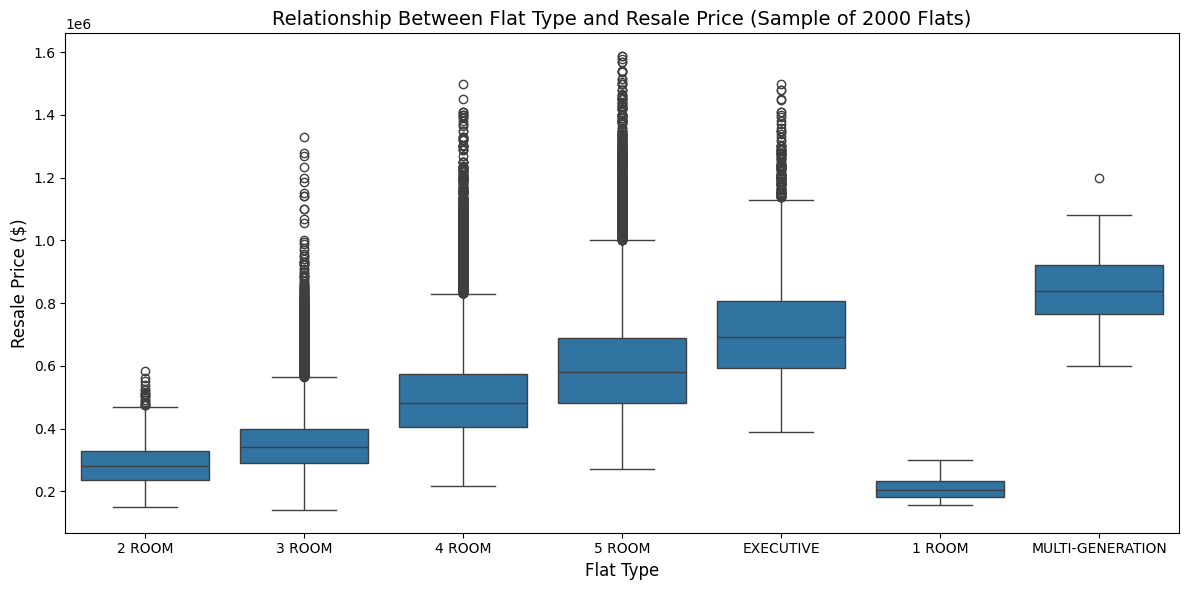

In [28]:
# Price by flat type

plt.figure(figsize=(12, 6))
sns.boxplot(x='flat_type',y='resale_price', data=df)
plt.title("Relationship Between Flat Type and Resale Price (Sample of 2000 Flats)", fontsize=14)
plt.xlabel("Flat Type", fontsize=12)
plt.ylabel("Resale Price ($)", fontsize=12)
plt.tight_layout()
plt.show()

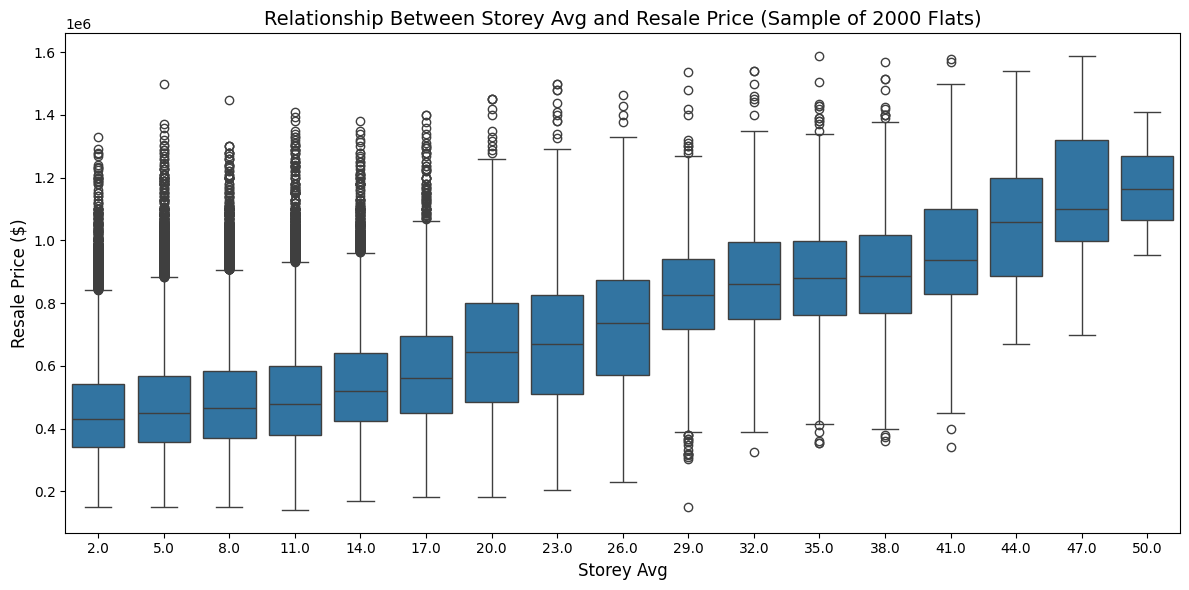

In [29]:
# Price by storey range

plt.figure(figsize=(12,6))
sns.boxplot(x='storey_avg', y='resale_price', data=df)
plt.title("Relationship Between Storey Avg and Resale Price (Sample of 2000 Flats)", fontsize=14)
plt.xlabel("Storey Avg", fontsize=12)
plt.ylabel("Resale Price ($)", fontsize=12)
plt.tight_layout()
plt.show()

### Locational & Temporal Analysis

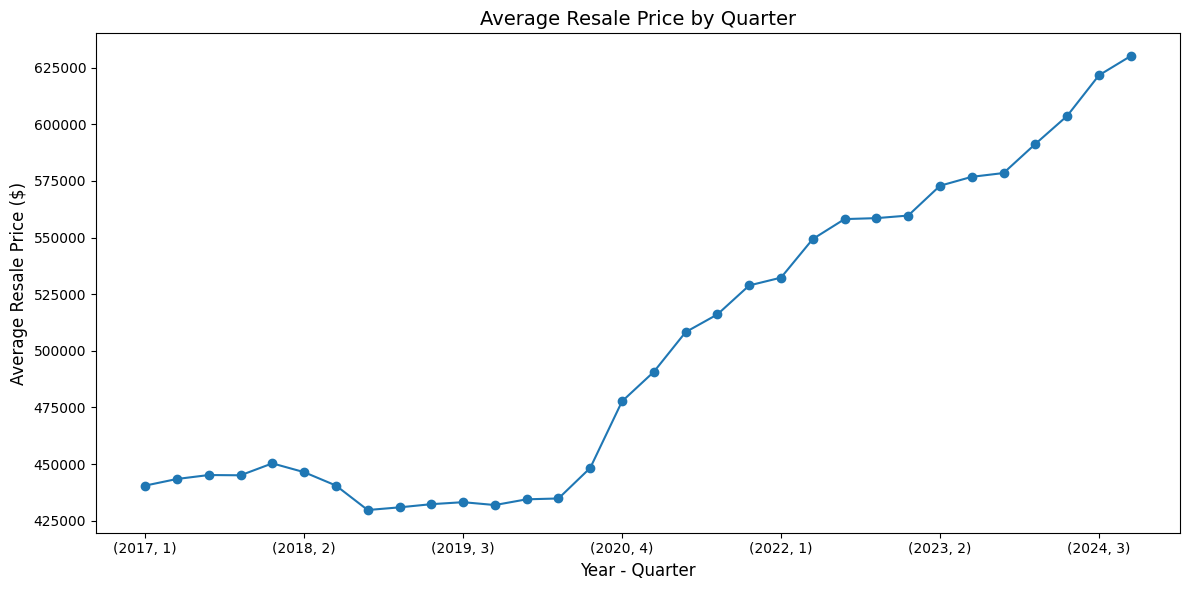

In [30]:
# Price by region 
# Create a year-quarter label, convert to string

df['year_quarter'] = df['year'].astype(str) + " Q" + df['quarter'].astype(str)

# Using quarter for time series analysis

quarterly = df.groupby(['year', 'quarter'])['resale_price'].mean()

plt.figure(figsize=(12,6))
quarterly.plot(marker='o')
plt.title("Average Resale Price by Quarter", fontsize=14)
plt.xlabel("Year - Quarter", fontsize=12)
plt.ylabel("Average Resale Price ($)", fontsize=12)
plt.tight_layout()
plt.show()

### Investigate temporal factors (month)

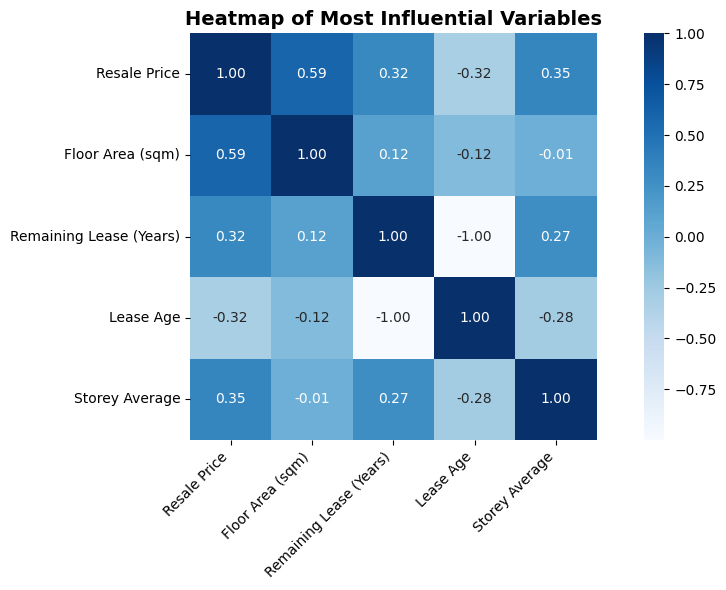

In [31]:
# Select Important Numeric Variables 
important_cols = ['resale_price','floor_area_sqm','remaining_lease_years','lease_age','storey_avg']

numeric_df = df[important_cols]

# Create Label Mapping for Prettier Heatmap Labels 
label_mapping = {
    'resale_price': 'Resale Price',
    'floor_area_sqm': 'Floor Area (sqm)',
    'remaining_lease_years': 'Remaining Lease (Years)',
    'lease_age': 'Lease Age',
    'storey_avg': 'Storey Average'
}

# Compute Correlation Matrix
corr = numeric_df.corr()

# Rename Labels for Display Only 
corr = corr.rename(index=label_mapping, columns=label_mapping)

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f", square=True)
plt.title("Heatmap of Most Influential Variables", fontsize=14, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Darryl - Feature Engineering

### Import Libraries

In [32]:
import requests
import time
import re
from tqdm import tqdm

### Read Data Engineered CSV File

In [33]:
df = pd.read_csv('HDB_Resale_Prices_Data_Engineered.csv')
df['month'] = pd.to_datetime(df['month']) # Ensure month is datetime

In [34]:
df.shape

(193875, 14)

In [35]:
df.head()

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,remaining_lease,resale_price,year,quarter,storey_avg,lease_age,remaining_lease_years
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,44.0,Improved,61 years 04 months,232000.0,2017,1,11.0,38,61.333333
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,67.0,New Generation,60 years 07 months,250000.0,2017,1,2.0,39,60.583333
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,67.0,New Generation,62 years 05 months,262000.0,2017,1,2.0,37,62.416667
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,68.0,New Generation,62 years 01 month,265000.0,2017,1,5.0,37,62.083333
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,67.0,New Generation,62 years 05 months,265000.0,2017,1,2.0,37,62.416667


### Checking for Unique Addresses, and Generating Postal Codes via OneMap API

In [36]:
# Checking for unique addresses
unique_addrs = df[['block', 'street_name']].drop_duplicates().reset_index(drop=True)
print(len(df), "rows total")
print(len(unique_addrs), "unique addresses")

193875 rows total
9598 unique addresses


In [37]:
# Retrieving postal codes for unique HDB block-street combinations using OneMap API
postal_cache = {}

def get_postal(block, street, max_retries=3):
    key = (block, street)
    if key in postal_cache:
        return postal_cache[key]

    url = "https://www.onemap.gov.sg/api/common/elastic/search"
    params = {
        "searchVal": f"{block} {street}",
        "returnGeom": "N",
        "getAddrDetails": "Y",
        "pageNum": 1
    }

    for attempt in range(max_retries):
        try:
            r = requests.get(url, params=params, timeout=15)
            r.raise_for_status()
            data = r.json()
            result = data['results'][0]['POSTAL'] if data.get('found', 0) > 0 else None
            postal_cache[key] = result
            return result

        except requests.exceptions.ReadTimeout:
            if attempt < max_retries - 1:
                time.sleep(2)
                continue
            print(f"Timeout for {key}, skipping.")
            postal_cache[key] = None
            return None

        except Exception as e:
            print(f"ERROR for {key}: {e}")
            postal_cache[key] = None
            return None

# Add postal_code column
unique_addrs['postal_code'] = pd.NA

batch_size = 200

for start in tqdm(range(0, len(unique_addrs), batch_size)):
    end = min(start + batch_size, len(unique_addrs))
    batch = unique_addrs.iloc[start:end]

    for idx, row in batch.iterrows():
        if pd.isna(unique_addrs.at[idx, 'postal_code']):
            unique_addrs.at[idx, 'postal_code'] = get_postal(row['block'], row['street_name'])

    time.sleep(1)


100%|██████████| 48/48 [40:39<00:00, 50.82s/it]


In [38]:
#Adding the postal codes collected back into your main dataframe
df = df.merge(unique_addrs, on=['block', 'street_name'], how='left')

In [39]:
# Saving and updating the CSV file
df.to_csv("HDB_Resale_Prices_Features_Engineered.csv", index=False)

In [40]:
#Checking for unique postal codes
unique_postals = df[['postal_code']].drop_duplicates().reset_index(drop=True)
unique_postals['lat'] = pd.NA
unique_postals['lon'] = pd.NA

print(len(unique_postals), "unique postal codes")

9597 unique postal codes


### Generating Latitude and Longtitude Values from Generated Postal Codes via OneMap API

In [41]:
# Retrieve latitude and longitude for a single postal code using OneMap API
def get_lat_lon(postal, max_retries=3):
    url = "https://www.onemap.gov.sg/api/common/elastic/search"
    params = {
        "searchVal": str(postal),
        "returnGeom": "Y",
        "getAddrDetails": "Y",
        "pageNum": 1
    }

    for attempt in range(max_retries):
        try:
            r = requests.get(url, params=params, timeout=8)
            r.raise_for_status()
            data = r.json()

            if data.get("found", 0) > 0:
                res = data['results'][0]
                return float(res['LATITUDE']), float(res['LONGITUDE'])

            return None, None

        except Exception as e:
            print(f"Error for postal {postal}: {e}")
            time.sleep(1)

    return None, None

In [43]:
# Batch retrieval of lat/lon for all unique postals
batch_size = 200

for start in tqdm(range(0, len(unique_postals), batch_size)):
    end = min(start + batch_size, len(unique_postals))
    batch = unique_postals.iloc[start:end]

    for idx, row in batch.iterrows():
        if pd.isna(unique_postals.at[idx, 'lat']):
            lat, lon = get_lat_lon(row['postal_code'])
            unique_postals.at[idx, 'lat'] = lat
            unique_postals.at[idx, 'lon'] = lon

    time.sleep(1)

100%|██████████| 48/48 [30:11<00:00, 37.75s/it]


In [44]:
#Adding lat/lon back into main dataframe
df = df.merge(unique_postals, on='postal_code', how='left')


In [45]:
# Ensure coordinates are numeric
df['lat'] = pd.to_numeric(df['lat'], errors='coerce')
df['lon'] = pd.to_numeric(df['lon'], errors='coerce')

# Saving and updating the CSV file
df.to_csv("HDB_Resale_Prices_Features_Engineered.csv", index=False)

In [46]:
df[['block', 'street_name', 'postal_code', 'lat', 'lon']].head()

,block,street_name,postal_code,lat,lon
0,406,ANG MO KIO AVE 10,560406,1.362005,103.853880
1,108,ANG MO KIO AVE 4,560108,1.370966,103.838202
2,602,ANG MO KIO AVE 5,560602,1.380709,103.835368
3,465,ANG MO KIO AVE 10,560465,1.366201,103.857201
4,601,ANG MO KIO AVE 5,560601,1.381041,103.835132


### Set Up of Haversine Formula, To Compute Distance Between Two Lat/Lon Points

In [47]:
def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Compute great-circle distance in km between two points.
    Inputs in decimal degrees.
    """
    R = 6371  # Earth radius in km

    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c

In [48]:
df = df.drop(columns=['dist_to_nearest_mrt_km', 'nearest_mrt_name',
                      'within_500m_mrt', 'within_1km_mrt'], errors='ignore')

### MRT Features

In [49]:
# Manually create MRT station dataframe
mrt = pd.DataFrame([
    # North South Line (NSL)
    ("Jurong East", 1.3331, 103.7420),
    ("Bukit Batok", 1.3490, 103.7496),
    ("Bukit Gombak", 1.3580, 103.7517),
    ("Choa Chu Kang", 1.3840, 103.7448),
    ("Yew Tee", 1.3975, 103.7477),
    ("Kranji", 1.4250, 103.7619),
    ("Marsiling", 1.4324, 103.7741),
    ("Woodlands", 1.4370, 103.7864),
    ("Admiralty", 1.4407, 103.8001),
    ("Sembawang", 1.4491, 103.8200),
    ("Canberra", 1.4437, 103.8334),
    ("Yishun", 1.4292, 103.8355),
    ("Khatib", 1.4174, 103.8339),
    ("Yio Chu Kang", 1.3818, 103.8441),
    ("Ang Mo Kio", 1.3691, 103.8498),
    ("Bishan", 1.3505, 103.8480),
    ("Braddell", 1.3402, 103.8467),
    ("Toa Payoh", 1.3320, 103.8471),
    ("Novena", 1.3201, 103.8439),
    ("Newton", 1.3135, 103.8399),
    ("Orchard", 1.3040, 103.8318),
    ("Somerset", 1.3002, 103.8384),
    ("Dhoby Ghaut", 1.2988, 103.8463),
    ("City Hall", 1.2931, 103.8520),
    ("Raffles Place", 1.2830, 103.8513),
    ("Marina Bay", 1.2763, 103.8547),
    ("Marina South Pier", 1.2708, 103.8630),

    # East West Line (EWL)
    ("Tuas Link", 1.3409, 103.6368),
    ("Tuas West Road", 1.3360, 103.6467),
    ("Tuas Crescent", 1.3307, 103.6543),
    ("Gul Circle", 1.3194, 103.6601),
    ("Joo Koon", 1.3274, 103.6785),
    ("Pioneer", 1.3375, 103.6973),
    ("Boon Lay", 1.3386, 103.7064),
    ("Lakeside", 1.3443, 103.7209),
    ("Chinese Garden", 1.3423, 103.7324),
    ("Clementi", 1.3145, 103.7654),
    ("Dover", 1.3112, 103.7786),
    ("Buona Vista", 1.3070, 103.7905),
    ("Commonwealth", 1.3023, 103.7983),
    ("Queenstown", 1.2940, 103.8061),
    ("Redhill", 1.2897, 103.8165),
    ("Tiong Bahru", 1.2851, 103.8301),
    ("Outram Park", 1.2802, 103.8391),
    ("Tanjong Pagar", 1.2760, 103.8459),
    ("Raffles Place", 1.2830, 103.8513),
    ("City Hall", 1.2931, 103.8520),
    ("Bugis", 1.3006, 103.8560),
    ("Lavender", 1.3077, 103.8632),
    ("Kallang", 1.3114, 103.8714),
    ("Aljunied", 1.3168, 103.8823),
    ("Paya Lebar", 1.3180, 103.8925),
    ("Eunos", 1.3197, 103.9031),
    ("Kembangan", 1.3219, 103.9120),
    ("Bedok", 1.3245, 103.9291),
    ("Tanah Merah", 1.3273, 103.9461),
    ("Simei", 1.3430, 103.9530),
    ("Tampines", 1.3534, 103.9457),
    ("Pasir Ris", 1.3730, 103.9492),
    ("Expo", 1.3345, 103.9617),
    ("Changi Airport", 1.3570, 103.9884),

    # North East Line (NEL)
    ("HarbourFront", 1.2653, 103.8222),
    ("Outram Park (NEL)", 1.2801, 103.8391),
    ("Chinatown", 1.2841, 103.8442),
    ("Clarke Quay", 1.2888, 103.8463),
    ("Dhoby Ghaut (NEL)", 1.2988, 103.8463),
    ("Little India", 1.3066, 103.8495),
    ("Farrer Park", 1.3126, 103.8532),
    ("Boon Keng", 1.3194, 103.8611),
    ("Potong Pasir", 1.3343, 103.8690),
    ("Woodleigh", 1.3402, 103.8705),
    ("Serangoon", 1.3491, 103.8730),
    ("Kovan", 1.3603, 103.8840),
    ("Hougang", 1.3705, 103.8923),
    ("Buangkok", 1.3821, 103.8927),
    ("Sengkang", 1.3903, 103.8950),
    ("Punggol", 1.4051, 103.9028),

    # Circle Line (CCL)
    ("HarbourFront (CCL)", 1.2653, 103.8222),
    ("Telok Blangah", 1.2708, 103.8093),
    ("Labrador Park", 1.2725, 103.8020),
    ("Pasir Panjang", 1.2761, 103.7910),
    ("Haw Par Villa", 1.2827, 103.7813),
    ("Kent Ridge", 1.2933, 103.7847),
    ("One-North", 1.2995, 103.7876),
    ("Buona Vista (CCL)", 1.3070, 103.7905),
    ("Holland Village", 1.3123, 103.7961),
    ("Farrer Road", 1.3170, 103.8071),
    ("Botanic Gardens", 1.3225, 103.8150),
    ("Caldecott", 1.3376, 103.8394),
    ("Marymount", 1.3497, 103.8451),
    ("Bishan (CCL)", 1.3505, 103.8480),
    ("Lorong Chuan", 1.3526, 103.8645),
    ("Serangoon (CCL)", 1.3491, 103.8730),
    ("Bartley", 1.3425, 103.8797),
    ("Tai Seng", 1.3359, 103.8873),
    ("MacPherson", 1.3267, 103.8896),
    ("Paya Lebar (CCL)", 1.3180, 103.8925),
    ("Dakota", 1.3025, 103.8881),
    ("Mountbatten", 1.3012, 103.8822),
    ("Stadium", 1.3026, 103.8753),
    ("Nicoll Highway", 1.2992, 103.8632),
    ("Promenade", 1.2936, 103.8591),
    ("Esplanade", 1.2922, 103.8573),
    ("Bras Basah", 1.2967, 103.8501),
    ("Dhoby Ghaut (CCL)", 1.2988, 103.8463),

    # Downtown Line (DTL)
    ("Bukit Panjang", 1.3784, 103.7638),
    ("Cashew", 1.3789, 103.7647),
    ("Hillview", 1.3712, 103.7683),
    ("Beauty World", 1.3416, 103.7757),
    ("King Albert Park", 1.3350, 103.7833),
    ("Sixth Avenue", 1.3242, 103.7961),
    ("Tan Kah Kee", 1.3253, 103.8075),
    ("Botanic Gardens (DTL)", 1.3225, 103.8150),
    ("Stevens", 1.3172, 103.8251),
    ("Newton (DTL)", 1.3135, 103.8399),
    ("Little India (DTL)", 1.3066, 103.8495),
    ("Rochor", 1.3063, 103.8520),
    ("Bugis (DTL)", 1.3006, 103.8560),
    ("Promenade (DTL)", 1.2936, 103.8591),
    ("Bayfront", 1.2827, 103.8591),
    ("Downtown", 1.2794, 103.8525),
    ("Telok Ayer", 1.2823, 103.8491),
    ("Chinatown (DTL)", 1.2841, 103.8442),
    ("Fort Canning", 1.2893, 103.8467),
    ("Bencoolen", 1.2992, 103.8502),
    ("Jalan Besar", 1.3078, 103.8568),
    ("Bendemeer", 1.3129, 103.8640),
    ("Geylang Bahru", 1.3216, 103.8715),
    ("Mattar", 1.3262, 103.8831),
    ("MacPherson (DTL)", 1.3267, 103.8896),
    ("Ubi", 1.3313, 103.8982),
    ("Kaki Bukit", 1.3365, 103.9095),
    ("Bedok North", 1.3379, 103.9251),
    ("Bedok Reservoir", 1.3453, 103.9334),
    ("Tampines West", 1.3454, 103.9393),
    ("Tampines East", 1.3568, 103.9538),
    ("Upper Changi", 1.3415, 103.9618),
    ("Expo (DTL)", 1.3345, 103.9617),

    # Thomson-East Coast Line (TEL)
    ("Woodlands North", 1.4489, 103.7855),
    ("Woodlands", 1.4370, 103.7864),
    ("Woodlands South", 1.4322, 103.7929),
    ("Springleaf", 1.4031, 103.8254),
    ("Lentor", 1.3901, 103.8358),
    ("Mayflower", 1.3719, 103.8403),
    ("Bright Hill", 1.3567, 103.8317),
    ("Upper Thomson", 1.3521, 103.8261),
    ("Caldecott (TEL)", 1.3376, 103.8394),
    ("Mount Pleasant", 1.3262, 103.8334),
    ("Stevens (TEL)", 1.3172, 103.8251),
    ("Napier", 1.3069, 103.8234),
    ("Orchard Boulevard", 1.3050, 103.8281),
    ("Orchard (TEL)", 1.3040, 103.8318),
    ("Great World", 1.2927, 103.8321),
    ("Havelock", 1.2889, 103.8316),
    ("Outram Park (TEL)", 1.2802, 103.8391),
    ("Maxwell", 1.2794, 103.8444),
    ("Shenton Way", 1.2765, 103.8479),
    ("Marina Bay (TEL)", 1.2763, 103.8547),
    ("Marina South", 1.2700, 103.8670),

], columns=["station_name", "lat", "lon"])

In [50]:
# Compute MRT lat/lon arrays for efficiency
mrt_lat = mrt['lat'].to_numpy(dtype=float)
mrt_lon = mrt['lon'].to_numpy(dtype=float)
mrt_names = mrt['station_name'].to_numpy()

def nearest_mrt(row):
    if pd.isna(row['lat']) or pd.isna(row['lon']):
        return pd.Series({
            'dist_to_nearest_mrt_km': np.nan,
            'nearest_mrt_name': None
        })
    dists = haversine_distance(float(row['lat']), float(row['lon']),
                               mrt_lat, mrt_lon)
    idx = np.argmin(dists)
    return pd.Series({
        'dist_to_nearest_mrt_km': float(dists[idx]),
        'nearest_mrt_name': mrt_names[idx]
    })

mrt_feats = df.apply(nearest_mrt, axis=1)
df = pd.concat([df, mrt_feats], axis=1)

df['within_500m_mrt'] = (df['dist_to_nearest_mrt_km'] <= 0.5).astype('Int64')
df['within_1km_mrt']  = (df['dist_to_nearest_mrt_km'] <= 1.0).astype('Int64')

In [51]:
print(df.columns[df.columns.duplicated()])
df[['postal_code', 'lat', 'lon', 'nearest_mrt_name',
    'dist_to_nearest_mrt_km', 'within_500m_mrt', 'within_1km_mrt']].head()

Index([], dtype='object')


,postal_code,lat,lon,nearest_mrt_name,dist_to_nearest_mrt_km,within_500m_mrt,within_1km_mrt
0,560406,1.362005,103.853880,Ang Mo Kio,0.910046,0,1
1,560108,1.370966,103.838202,Mayflower,0.255289,1,1
2,560602,1.380709,103.835368,Yio Chu Kang,0.978201,0,1
3,560465,1.366201,103.857201,Ang Mo Kio,0.883612,0,1
4,560601,1.381041,103.835132,Yio Chu Kang,1.000497,0,0


### CBD Distance, Travel Time Features

In [52]:
df = df.drop(columns=[
    'dist_to_cbd_km',
    'pt_time_to_cbd_min',
    'pt_time_to_cbd_min_adj',
    'drive_time_to_cbd_min'
], errors='ignore')

# Raffles Place / Downtown Core as CBD centre
CBD_LAT, CBD_LON = 1.2830, 103.8513

In [53]:
# Compute distance to CBD
df['dist_to_cbd_km'] = haversine_distance(
    df['lat'].astype(float),
    df['lon'].astype(float),
    CBD_LAT,
    CBD_LON
)

In [54]:
df['dist_to_cbd_km'].describe()

count    193875.000000
mean         12.506681
std           4.400873
min           0.591812
25%           9.776058
50%          13.435929
75%          15.491067
max          20.312713
Name: dist_to_cbd_km, dtype: float64

In [55]:
# Estimate public transport time to CBD
AVG_PT_SPEED_KMH = 15.0 

df['pt_time_to_cbd_min'] = (df['dist_to_cbd_km'] / AVG_PT_SPEED_KMH) * 60


df['pt_time_to_cbd_min_adj'] = df['pt_time_to_cbd_min'] + np.where(
    df['within_500m_mrt'] == 1,
    0,   # no penalty if near MRT
    8    # 8 min penalty if far (walk + bus)
)

In [56]:
# Estimate driving time to CBD
AVG_DRIVE_SPEED_KMH = 35.0

df['drive_time_to_cbd_min'] = (df['dist_to_cbd_km'] / AVG_DRIVE_SPEED_KMH) * 60

In [57]:
df[['dist_to_cbd_km', 'pt_time_to_cbd_min_adj', 'drive_time_to_cbd_min']].head()

,dist_to_cbd_km,pt_time_to_cbd_min_adj,drive_time_to_cbd_min
0,8.789584,43.158337,15.067859
1,9.889191,39.556763,16.952899
2,11.008129,52.032517,18.871079
3,9.274761,45.099043,15.899590
4,11.048869,52.195477,18.940919


In [58]:
df.head()

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,remaining_lease,resale_price,year,...,lat,lon,dist_to_nearest_mrt_km,nearest_mrt_name,within_500m_mrt,within_1km_mrt,dist_to_cbd_km,pt_time_to_cbd_min,pt_time_to_cbd_min_adj,drive_time_to_cbd_min
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,44.0,Improved,61 years 04 months,232000.0,2017,...,1.362005,103.853880,0.910046,Ang Mo Kio,0,1,8.789584,35.158337,43.158337,15.067859
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,67.0,New Generation,60 years 07 months,250000.0,2017,...,1.370966,103.838202,0.255289,Mayflower,1,1,9.889191,39.556763,39.556763,16.952899
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,67.0,New Generation,62 years 05 months,262000.0,2017,...,1.380709,103.835368,0.978201,Yio Chu Kang,0,1,11.008129,44.032517,52.032517,18.871079
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,68.0,New Generation,62 years 01 month,265000.0,2017,...,1.366201,103.857201,0.883612,Ang Mo Kio,0,1,9.274761,37.099043,45.099043,15.899590
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,67.0,New Generation,62 years 05 months,265000.0,2017,...,1.381041,103.835132,1.000497,Yio Chu Kang,0,0,11.048869,44.195477,52.195477,18.940919


### School Proximity Features

In [59]:
# Manually create school dataframes
# Top 30 Primary Schools
primary_top30 = pd.DataFrame([
    ("Holy Innocents' Primary School", 1.36906, 103.89020),
    ("Ai Tong School", 1.35816, 103.83541),
    ("Nan Chiau Primary School", 1.38620, 103.89300),
    ("Chongfu School", 1.43181, 103.83510),
    ("Nanyang Primary School", 1.32030, 103.80740),
    ("CHIJ Primary (Toa Payoh)", 1.33841, 103.84878),
    ("Methodist Girls' School (Primary)", 1.34117, 103.77560),
    ("Tao Nan School", 1.30501, 103.91141),
    ("Kong Hwa School", 1.31538, 103.88961),
    ("Nan Hua Primary School", 1.31416, 103.76614),
    ("Catholic High School (Primary)", 1.35482, 103.84500),
    ("Rulang Primary School", 1.34979, 103.71700),
    ("CHIJ St. Nicholas Girls' School (Primary)", 1.3718, 103.8439),
    ("Singapore Chinese Girls' Primary School", 1.31920, 103.82600),
    ("St. Hilda’s Primary School", 1.35538, 103.94032),
    ("Anglo-Chinese School (Junior)", 1.30946, 103.84141),
    ("St. Joseph’s Institution Junior", 1.31630, 103.83550),
    ("Fairfield Methodist School (Primary)", 1.31180, 103.78570),
    ("Rosyth School", 1.37287, 103.87451),
    ("Kuo Chuan Presbyterian Primary School", 1.34988, 103.70912),
    ("Maris Stella High (Primary Section)", 1.33985, 103.87568),
    ("Henry Park Primary School", 1.31834, 103.78573),
    ("Anglo-Chinese School (Primary)", 1.31881, 103.83582),  
    ("Red Swastika School", 1.32492, 103.94948),
    ("Pei Chun Public School", 1.33800, 103.86760),
    ("Princess Elizabeth Primary School", 1.34968, 103.74103),
    ("Pei Hwa Presbyterian Primary School", 1.34100, 103.77490),
    ("St. Anthony’s Primary School", 1.34670, 103.70700),
    ("Pasir Ris Primary School", 1.37770, 103.93880),
    ("South View Primary School", 1.38190, 103.74010),
], columns=["school_name", "lat", "lon"])

# Top 30 Secondary Schools
secondary_top30 = pd.DataFrame([
    ("Raffles Girls' School (Secondary)", 1.31660, 103.81790),
    ("Nanyang Girls' High School", 1.31960, 103.80760),
    ("Hwa Chong Institution (High School)", 1.32632, 103.80358),
    ("Raffles Institution (Secondary)", 1.34240, 103.84720),
    ("Methodist Girls' School (Secondary)", 1.34130, 103.77620),
    ("Anglo-Chinese School (Independent)", 1.30270, 103.78070),  # placeholder
    ("CHIJ St. Nicholas Girls' School", 1.37180, 103.84390),
    ("Dunman High School", 1.30690, 103.88250),
    ("Catholic High School (Secondary)", 1.35482, 103.84500),
    ("River Valley High School", 1.33740, 103.69770),
    ("Cedar Girls' Secondary School", 1.33700, 103.87130),
    ("Singapore Chinese Girls' School (Secondary)", 1.31920, 103.82600),
    ("Victoria School", 1.30820, 103.93290),
    ("St Joseph's Institution (Secondary)", 1.32400, 103.84050),
    ("Maris Stella High School (Secondary)", 1.33990, 103.87560),
    ("Anglican High School", 1.32690, 103.94650),
    ("Paya Lebar Methodist Girls' School (Secondary)", 1.34140, 103.88370),
    ("Crescent Girls' School", 1.29570, 103.81990),
    ("Temasek Secondary School", 1.32390, 103.93830),
    ("Tanjong Katong Secondary School", 1.30590, 103.89780),
    ("St Andrew’s Secondary School", 1.33370, 103.86770),
    ("Hai Sing Catholic School", 1.37170, 103.94790),
    ("St Anthony’s Canossian Secondary School", 1.32350, 103.92400),
    ("CHIJ Secondary (Toa Payoh)", 1.33850, 103.84860),
    ("CHIJ Katong Convent", 1.30930, 103.91240),
    ("CHIJ St Joseph’s Convent", 1.37910, 103.89040),
    ("Holy Innocents' High School", 1.37230, 103.89080),
    ("Kuo Chuan Presbyterian Secondary School", 1.33790, 103.84980),
    ("Chung Cheng High School (Main)", 1.30531, 103.89152),
    ("Nan Hua High School", 1.31470, 103.76620),
], columns=["school_name", "lat", "lon"])

# Junior Colleges
jc_schools = pd.DataFrame([
    ("Anderson Serangoon Junior College", 1.3615, 103.8928),
    ("Anglo-Chinese Junior College", 1.3055, 103.8280),
    ("Catholic Junior College", 1.3447, 103.8392),
    ("Dunman High School (JC Section)", 1.3069, 103.8825),
    ("Eunoia Junior College", 1.3396, 103.8873),
    ("Hwa Chong Institution (JC)", 1.3520, 103.7710),
    ("Jurong Pioneer Junior College", 1.3399, 103.7139),
    ("Nanyang Junior College", 1.3812, 103.7708),
    ("National Junior College", 1.3248, 103.8444),
    ("Raffles Institution (JC)", 1.3424, 103.8472),
    ("River Valley High School (JC Section)", 1.3374, 103.6977),
    ("St Andrew’s Junior College", 1.3337, 103.8677),
    ("St Joseph’s Institution (JC)", 1.3240, 103.8405),
    ("Tampines Meridian Junior College", 1.3531, 103.9414),
    ("Temasek Junior College", 1.3239, 103.9383),
    ("Victoria Junior College", 1.3082, 103.9329),
    ("Yishun Innova Junior College", 1.4306, 103.8338),
], columns=["school_name", "lat", "lon"])

# Polytechnics
poly_schools = pd.DataFrame([
    ("Singapore Polytechnic", 1.3030, 103.7714),
    ("Ngee Ann Polytechnic", 1.3378, 103.7734),
    ("Temasek Polytechnic", 1.3446, 103.9570),
    ("Nanyang Polytechnic", 1.3716, 103.7728),
    ("Republic Polytechnic", 1.4335, 103.7863),
], columns=["school_name", "lat", "lon"])

In [60]:
# Primary School Features

prim_lat = primary_top30['lat'].to_numpy(dtype=float)
prim_lon = primary_top30['lon'].to_numpy(dtype=float)
prim_names = primary_top30['school_name'].to_numpy()

def nearest_top_primary(row):
    if pd.isna(row['lat']) or pd.isna(row['lon']):
        return pd.Series({
            'dist_to_nearest_top_primary_km': np.nan,
            'nearest_top_primary_name': None,
            'within_1km_top_primary': pd.NA
        })
    dists = haversine_distance(row['lat'], row['lon'], prim_lat, prim_lon)
    idx = np.argmin(dists)
    return pd.Series({
        'dist_to_nearest_top_primary_km': float(dists[idx]),
        'nearest_top_primary_name': prim_names[idx],
        'within_1km_top_primary': int(dists[idx] <= 1.0)
    })

top_prim_feats = df.apply(nearest_top_primary, axis=1)
df = pd.concat([df, top_prim_feats], axis=1)

df['within_1km_top_primary'] = df['within_1km_top_primary'].astype('Int64')

In [61]:
# Secondary School Features

sec_lat = secondary_top30['lat'].to_numpy(dtype=float)
sec_lon = secondary_top30['lon'].to_numpy(dtype=float)
sec_names = secondary_top30['school_name'].to_numpy()

def nearest_top_secondary(row):
    if pd.isna(row['lat']) or pd.isna(row['lon']):
        return pd.Series({
            'dist_to_nearest_top_secondary_km': np.nan,
            'nearest_top_secondary_name': None,
            'within_2km_top_secondary': pd.NA
        })
    dists = haversine_distance(row['lat'], row['lon'], sec_lat, sec_lon)
    idx = np.argmin(dists)
    return pd.Series({
        'dist_to_nearest_top_secondary_km': float(dists[idx]),
        'nearest_top_secondary_name': sec_names[idx],
        'within_2km_top_secondary': int(dists[idx] <= 2.0)
    })

top_sec_feats = df.apply(nearest_top_secondary, axis=1)
df = pd.concat([df, top_sec_feats], axis=1)

df['within_2km_top_secondary'] = df['within_2km_top_secondary'].astype('Int64')

In [62]:
# Junior College Features

jc_lat = jc_schools['lat'].to_numpy(dtype=float)
jc_lon = jc_schools['lon'].to_numpy(dtype=float)
jc_names = jc_schools['school_name'].to_numpy()

def nearest_jc(row):
    if pd.isna(row['lat']) or pd.isna(row['lon']):
        return pd.Series({
            'dist_to_nearest_jc_km': np.nan,
            'nearest_jc_name': None,
            'within_3km_jc': pd.NA
        })
    dists = haversine_distance(row['lat'], row['lon'], jc_lat, jc_lon)
    idx = np.argmin(dists)
    return pd.Series({
        'dist_to_nearest_jc_km': float(dists[idx]),
        'nearest_jc_name': jc_names[idx],
        'within_3km_jc': int(dists[idx] <= 3.0)
    })

jc_feats = df.apply(nearest_jc, axis=1)
df = pd.concat([df, jc_feats], axis=1)

df['within_3km_jc'] = df['within_3km_jc'].astype('Int64')

In [63]:
# Polytechnic Features

poly_lat = poly_schools['lat'].to_numpy(dtype=float)
poly_lon = poly_schools['lon'].to_numpy(dtype=float)
poly_names = poly_schools['school_name'].to_numpy()

def nearest_poly(row):
    if pd.isna(row['lat']) or pd.isna(row['lon']):
        return pd.Series({
            'dist_to_nearest_poly_km': np.nan,
            'nearest_poly_name': None,
            'within_5km_poly': pd.NA
        })
    dists = haversine_distance(row['lat'], row['lon'], poly_lat, poly_lon)
    idx = np.argmin(dists)
    return pd.Series({
        'dist_to_nearest_poly_km': float(dists[idx]),
        'nearest_poly_name': poly_names[idx],
        'within_5km_poly': int(dists[idx] <= 5.0)
    })

poly_feats = df.apply(nearest_poly, axis=1)
df = pd.concat([df, poly_feats], axis=1)

df['within_5km_poly'] = df['within_5km_poly'].astype('Int64')

In [64]:
df[[
    'nearest_top_primary_name', 'dist_to_nearest_top_primary_km', 'within_1km_top_primary',
    'nearest_top_secondary_name', 'dist_to_nearest_top_secondary_km', 'within_2km_top_secondary',
    'nearest_jc_name', 'dist_to_nearest_jc_km', 'within_3km_jc',
    'nearest_poly_name', 'dist_to_nearest_poly_km', 'within_5km_poly'
]].head()

,nearest_top_primary_name,dist_to_nearest_top_primary_km,within_1km_top_primary,nearest_top_secondary_name,dist_to_nearest_top_secondary_km,within_2km_top_secondary,nearest_jc_name,dist_to_nearest_jc_km,within_3km_jc,nearest_poly_name,dist_to_nearest_poly_km,within_5km_poly
0,Catholic High School (Primary),1.269893,0,Catholic High School (Secondary),1.269893,1,Raffles Institution (JC),2.302928,1,Nanyang Polytechnic,9.076043,0
1,CHIJ St. Nicholas Girls' School (Primary),0.640161,1,CHIJ St. Nicholas Girls' School,0.640161,1,Catholic Junior College,2.922792,1,Nanyang Polytechnic,7.270623,0
2,CHIJ St. Nicholas Girls' School (Primary),1.371428,0,CHIJ St. Nicholas Girls' School,1.371428,1,Catholic Junior College,4.026592,0,Nanyang Polytechnic,7.028624,0
3,CHIJ St. Nicholas Girls' School (Primary),1.604305,0,CHIJ St. Nicholas Girls' School,1.604305,1,Raffles Institution (JC),2.870581,1,Nanyang Polytechnic,9.401468,0
4,CHIJ St. Nicholas Girls' School (Primary),1.416330,0,CHIJ St. Nicholas Girls' School,1.416330,1,Catholic Junior College,4.066201,0,Nanyang Polytechnic,7.008054,0


### Floor, Lease and Age Features

In [65]:
def parse_remaining_lease(s):
    """
    Convert strings like '63 years 04 months' to float years, e.g. 63.33
    Handles missing / malformed safely.
    """
    if pd.isna(s):
        return np.nan
    s = str(s).lower()
    parts = s.replace(',', '').split()

    years = 0
    months = 0

    for i, token in enumerate(parts):
        if token.isdigit():
            val = int(token)
            if i + 1 < len(parts):
                next_tok = parts[i + 1]
                if 'year' in next_tok:
                    years = val
                elif 'month' in next_tok:
                    months = val

    return years + months / 12.0

df['remaining_lease_years'] = df['remaining_lease'].apply(parse_remaining_lease)

In [66]:
# Creating lease age buckets
df['estate_age_bucket'] = pd.cut(
    df['remaining_lease_years'],
    bins=[0, 10, 20, 30, 40, 50, 99],
    labels=['0–10y', '10–20y', '20–30y', '30–40y', '40–50y', '50y+'],
    right=False
)

In [67]:
# Creating boolean features for mature and very old estates
df['lease_commence_year'] = df['year'] - df['lease_age']

df['is_mature_estate'] = (df['lease_commence_year'] <= 1995).astype('Int64')
df['is_very_old_estate'] = (df['lease_commence_year'] <= 1985).astype('Int64')

In [68]:
# Adding average floor level feature
df['avg_floor'] = df['storey_avg'] 

In [69]:
# Creating floor level categories
def floor_category(avg_floor):
    if pd.isna(avg_floor):
        return "Unknown"
    elif avg_floor <= 3:
        return "Low (1–3)"
    elif avg_floor <= 9:
        return "Mid (4–9)"
    elif avg_floor <= 19:
        return "High (10–19)"
    else:
        return "Premium High (20+)"
    
df['floor_category'] = df['avg_floor'].apply(floor_category)

In [70]:
# Creating floor level tiers as numeric feature
def floor_tier(avg_floor):
    if pd.isna(avg_floor):
        return 0
    elif avg_floor <= 3:
        return 1
    elif avg_floor <= 9:
        return 2
    elif avg_floor <= 19:
        return 3
    else:
        return 4

df['floor_tier'] = df['avg_floor'].apply(floor_tier)

In [71]:
# Creating floor tier numeric feature
df['floor_premium_factor'] = df['floor_tier'].map({
    0: 0.00,   # unknown
    1: -0.02,  # low floor penalty
    2:  0.00,  # mid floor baseline
    3:  0.02,  # high floor premium
    4:  0.04   # very high floor premium
})

In [72]:
df[['storey_avg', 'avg_floor', 'floor_category', 'floor_tier']].head()

,storey_avg,avg_floor,floor_category,floor_tier
0,11.0,11.0,High (10–19),3
1,2.0,2.0,Low (1–3),1
2,2.0,2.0,Low (1–3),1
3,5.0,5.0,Mid (4–9),2
4,2.0,2.0,Low (1–3),1


### MRT Noise and CBD Noise Features

In [73]:
# Creating noise-related features based on MRT distance and floor level
df['is_mrt_noise_zone'] = (
    (df['dist_to_nearest_mrt_km'] <= 0.15)
).astype('Int64')

df['is_mrt_influence_zone'] = (
    (df['dist_to_nearest_mrt_km'] <= 0.30)
).astype('Int64')

df['is_high_mrt_noise_low_floor'] = (
    (df['dist_to_nearest_mrt_km'] <= 0.15) &
    (df['avg_floor'] <= 6)
).astype('Int64')

def cbd_noise_band(d):
    if pd.isna(d):
        return "Unknown"
    if d <= 3:
        return "Inner Core (<=3km)"
    elif d <= 6:
        return "Mid Ring (3–6km)"
    else:
        return "Outer Ring (>6km)"

df['cbd_noise_band'] = df['dist_to_cbd_km'].apply(cbd_noise_band)

def compute_noise_score(row):
    score = 0
    
    d_mrt = row['dist_to_nearest_mrt_km']
    if not pd.isna(d_mrt):
        if d_mrt <= 0.15:
            score += 2
        elif d_mrt <= 0.30:
            score += 1

    f = row['avg_floor']
    if not pd.isna(f):
        if f <= 3:
            score += 1  
        elif f <= 6:
            score += 1  


    d_cbd = row['dist_to_cbd_km']
    if not pd.isna(d_cbd) and d_cbd <= 3:
        score += 1

    return score

df['noise_score'] = df.apply(compute_noise_score, axis=1).astype('Int64')

def noise_category(score):
    if pd.isna(score):
        return "Unknown"
    if score <= 1:
        return "Low"
    elif score <= 3:
        return "Moderate"
    elif score == 4:
        return "High"
    else:
        return "Very High"

df['noise_category'] = df['noise_score'].apply(noise_category)

### Transaction History Features

In [74]:
# Extract year
df['year'] = df['month'].dt.year

# We'll treat each physical block as (town, block, street_name) combo
block_key = ['town', 'block', 'street_name']

# Block Level Transaction Counts
df['block_year_txn'] = (
    df.groupby(block_key + ['year'])['resale_price']
      .transform('count')
      .astype('Int64')
)

# Total historical transactions per block
df['block_total_txn'] = (
    df.groupby(block_key)['resale_price']
      .transform('count')
      .astype('Int64')
)

# Town Level Transaction Counts
# Transactions per town per year
df['town_year_txn'] = (
    df.groupby(['town', 'year'])['resale_price']
      .transform('count')
      .astype('Int64')
)

# Total historical transactions per town
df['town_total_txn'] = (
    df.groupby(['town'])['resale_price']
      .transform('count')
      .astype('Int64')
)


# Block share of town-year transactions
# For each town-year, what fraction of transactions come from this block?
df['block_share_of_town_year'] = (
    df['block_year_txn'] / df['town_year_txn']
)
df['block_share_of_town_year_pct'] = 100 * df['block_share_of_town_year']


# Block Competition Rank within Town-Year
# Rank blocks by how active they are in that town-year.
# Lower rank = more active / more visible block.
df['block_year_rank_in_town'] = (
    df.groupby(['town', 'year'])['block_year_txn']
      .rank(ascending=False, method='dense')
      .astype('Int64')
)


# Cumulative Transaction Counts over Time (Dynamic Supply Pressure)
# Sort by time so cumcount follows chronological order
df = df.sort_values('month')

# Cumulative number of transactions in this block up to this sale
df['block_cum_txn'] = (
    df.groupby(block_key)
      .cumcount() + 1
)

# Cumulative number of transactions in this town up to this sale
df['town_cum_txn'] = (
    df.groupby('town')
      .cumcount() + 1
)

df['block_cum_txn'] = df['block_cum_txn'].astype('Int64')
df['town_cum_txn'] = df['town_cum_txn'].astype('Int64')

In [75]:
df[
    [
        'block_year_txn', 'block_total_txn',
        'town_year_txn', 'town_total_txn',
        'block_share_of_town_year', 'block_share_of_town_year_pct',
        'block_year_rank_in_town',
        'block_cum_txn', 'town_cum_txn'
    ]
].head()

,block_year_txn,block_total_txn,town_year_txn,town_total_txn,block_share_of_town_year,block_share_of_town_year_pct,block_year_rank_in_town,block_cum_txn,town_cum_txn
0,2,18,930,7974,0.002151,0.215054,10,1,1
787,4,26,522,5381,0.007663,0.766284,7,1,1
786,5,26,522,5381,0.009579,0.957854,6,1,2
785,2,21,522,5381,0.003831,0.383142,9,1,3
784,6,47,526,5335,0.011407,1.140684,8,1,1


### Mall, Bus Interchanges, Hawker, Hospital Features

In [76]:
# Manually creating Shopping Mall Dataframe
malls = pd.DataFrame([
    ("Marina Bay Sands (The Shoppes)", 1.2834, 103.8607),
    ("Marina Square", 1.2920, 103.8570),
    ("Suntec City", 1.2930, 103.8575),
    ("Millenia Walk", 1.2927, 103.8605),
    ("Raffles City Shopping Centre", 1.2937, 103.8530),
    ("Capitol Piazza", 1.2947, 103.8515),
    ("Funan", 1.2936, 103.8497),
    ("Bugis Junction", 1.2997, 103.8553),
    ("Bugis+", 1.2990, 103.8543),
    ("Duo Galleria", 1.3008, 103.8573),
    ("Chinatown Point", 1.2851, 103.8436),
    ("People’s Park Complex", 1.2834, 103.8430),
    ("People’s Park Centre", 1.2841, 103.8435),
    ("Central @ Clarke Quay", 1.2895, 103.8461),
    ("Velocity @ Novena Square", 1.3203, 103.8431),
    ("Square 2", 1.3208, 103.8436),
    ("United Square", 1.3187, 103.8433),
    ("Goldhill Plaza", 1.3185, 103.8439),

    # North
    ("Northpoint City (Yishun)", 1.4295, 103.8353),
    ("Sembawang Shopping Centre", 1.4472, 103.8204),
    ("Sun Plaza (Sembawang)", 1.4491, 103.8200),
    ("Causeway Point (Woodlands)", 1.4353, 103.7856),
    ("Woods Square Mall", 1.4381, 103.7871),
    ("Vista Point", 1.4346, 103.7919),
    ("Canberra Plaza", 1.4443, 103.8299),
    ("Junction 10", 1.3806, 103.7613),  # Bukit Panjang border

    # North-East
    ("NEX (Serangoon)", 1.3508, 103.8725),
    ("Heartland Mall (Kovan)", 1.3597, 103.8866),
    ("Hougang Mall", 1.3714, 103.8922),
    ("Hougang 1", 1.3726, 103.8829),
    ("Compass One (Sengkang)", 1.3925, 103.8950),
    ("Rivervale Mall", 1.3898, 103.9023),
    ("Rivervale Plaza", 1.3872, 103.9025),
    ("Waterway Point (Punggol)", 1.4060, 103.9024),
    ("Punggol Plaza", 1.3986, 103.9079),
    ("Oasis Terraces", 1.4057, 103.9094),
    ("The Seletar Mall (Fernvale)", 1.3920, 103.8795),

    # East
    ("Tampines Mall", 1.3532, 103.9454),
    ("Tampines 1", 1.3540, 103.9450),
    ("Century Square", 1.3533, 103.9458),
    ("Our Tampines Hub", 1.3562, 103.9407),
    ("Bedok Mall", 1.3245, 103.9291),
    ("White Sands", 1.3722, 103.9495),
    ("Downtown East (E!Hub / Market Square)", 1.3770, 103.9545),
    ("Parkway Parade", 1.3023, 103.9058),
    ("i12 Katong", 1.3058, 103.9076),
    ("Katong Shopping Centre", 1.3044, 103.9053),
    ("Katong Square", 1.3046, 103.9059),
    ("KINEX (OneKM)", 1.3142, 103.8971),
    ("PLQ Mall (Paya Lebar Quarter)", 1.3170, 103.8924),
    ("Paya Lebar Square", 1.3182, 103.8920),
    ("SingPost Centre", 1.3187, 103.8928),
    ("Jewel Changi Airport", 1.3592, 103.9894),
    ("Changi City Point", 1.3341, 103.9623),

    # West
    ("Westgate", 1.3341, 103.7423),
    ("Jem", 1.3331, 103.7430),
    ("IMM Mall", 1.3330, 103.7460),
    ("Jurong Point", 1.3396, 103.7063),
    ("Pioneer Mall", 1.3436, 103.6978),
    ("West Mall", 1.3506, 103.7494),
    ("Lot One Shoppers’ Mall", 1.3852, 103.7444),
    ("Hillion Mall", 1.3788, 103.7629),
    ("Bukit Panjang Plaza", 1.3788, 103.7640),
    ("The Clementi Mall", 1.3147, 103.7654),
    ("Grantral Mall Clementi", 1.3150, 103.7641),
    ("West Coast Plaza", 1.3044, 103.7641),
    ("The Star Vista", 1.3065, 103.7884),
    ("The Rail Mall", 1.3535, 103.7764),
    ("Gek Poh Shopping Centre", 1.3464, 103.7128),
    ("Le Quest Mall", 1.3552, 103.7487),

    # Central / Others
    ("Thomson Plaza", 1.3546, 103.8333),
    ("Tiong Bahru Plaza", 1.2863, 103.8273),
    ("Bukit Timah Plaza", 1.3293, 103.7915),
    ("Beauty World Centre", 1.3412, 103.7757),
    ("Beauty World Plaza", 1.3416, 103.7755),
    ("Coronation Shopping Plaza", 1.3238, 103.8118),
    ("Marine Parade Centre", 1.3013, 103.9042),
    ("Anchorpoint (Queenstown)", 1.2887, 103.8066),
    ("Queensway Shopping Centre", 1.2884, 103.8047),
    ("Chinatown Plaza", 1.2823, 103.8419),
    ("Peninsula Plaza", 1.2931, 103.8523),
    ("Mustafa Centre", 1.3106, 103.8560),
    ("Sim Lim Square", 1.3039, 103.8549),
], columns=["mall_name", "lat", "lon"])

In [77]:
# Manually creating Bus Interchange Dataframe
bus_interchanges = pd.DataFrame([
    ("Ang Mo Kio Interchange", 1.3694, 103.8493),
    ("Bedok Interchange", 1.3245, 103.9291),
    ("Bishan Interchange", 1.3503, 103.8490),
    ("Boons Lay Interchange", 1.3386, 103.7064),
    ("Bukit Batok Interchange", 1.3501, 103.7495),
    ("Bukit Merah Interchange", 1.2779, 103.8274),
    ("Choa Chu Kang Interchange", 1.3851, 103.7445),
    ("Clementi Interchange", 1.3150, 103.7654),
    ("Compassvale Interchange", 1.3936, 103.8975),
    ("Hougang Central Interchange", 1.3713, 103.8928),
    ("Jurong East Interchange", 1.3333, 103.7430),
    ("Kovan Hub", 1.3603, 103.8840),
    ("Pasir Ris Interchange", 1.3723, 103.9490),
    ("Punggol Interchange", 1.4050, 103.9020),
    ("Sembawang Interchange", 1.4492, 103.8200),
    ("Sengkang Interchange", 1.3924, 103.8950),
    ("Serangoon Interchange", 1.3508, 103.8725),
    ("Tampines Interchange", 1.3533, 103.9453),
    ("Toa Payoh Interchange", 1.3330, 103.8471),
    ("Woodlands Interchange", 1.4371, 103.7864),
    ("Yishun Interchange", 1.4295, 103.8353),
], columns=["interchange_name", "lat", "lon"])

In [78]:
# Manually creating Hawker Centre Dataframe
hawkers = pd.DataFrame([
    ("Maxwell Food Centre", 1.2805, 103.8442),
    ("Chinatown Complex Food Centre", 1.2837, 103.8431),
    ("Amoy Street Food Centre", 1.2798, 103.8457),
    ("Old Airport Road Food Centre", 1.3067, 103.8884),
    ("Tiong Bahru Market", 1.2848, 103.8265),
    ("Lau Pa Sat", 1.2805, 103.8504),
    ("Newton Food Centre", 1.3121, 103.8398),
    ("Tekka Centre", 1.3051, 103.8520),
    ("Golden Mile Food Centre", 1.3023, 103.8630),
    ("Hong Lim Food Centre", 1.2837, 103.8459),
    ("Zion Riverside Food Centre", 1.2929, 103.8338),
    ("Berseh Food Centre", 1.3064, 103.8570),
    ("Geylang Serai Market", 1.3183, 103.8943),
    ("Bedok 85 Fengshan", 1.3248, 103.9338),
    ("Chomp Chomp Food Centre", 1.3639, 103.8666),
    ("Serangoon Garden Market", 1.3642, 103.8658),
    ("ABC Brickworks Food Centre", 1.2864, 103.8054),
    ("Bukit Timah Market", 1.3412, 103.7758),
    ("Jurong West St 52 HC", 1.3475, 103.7141),
    ("Yishun Park Hawker Centre", 1.4310, 103.8371),
], columns=["hawker_name", "lat", "lon"])

In [79]:
# Manually creating Hospital Dataframe
hospitals = pd.DataFrame([
    # --- ACUTE GENERAL HOSPITALS ---
    ("Changi General Hospital", 1.341600, 103.949300),
    ("KK Women's and Children's Hospital", 1.310600, 103.844100),
    ("Sengkang General Hospital", 1.395300, 103.886400),
    ("Singapore General Hospital", 1.279900, 103.834300),
    ("Khoo Teck Puat Hospital", 1.424600, 103.839400),
    ("Tan Tock Seng Hospital", 1.320300, 103.844700),
    ("Woodlands Health Campus", 1.443700, 103.785900),
    ("Alexandra Hospital", 1.288800, 103.802800),
    ("National University Hospital", 1.293500, 103.783900),
    ("Ng Teng Fong General Hospital", 1.334300, 103.744500),
    ("Mount Alvernia Hospital", 1.339300, 103.840600),
    ("Crawfurd Hospital", 1.313200, 103.776000),
    ("Farrer Park Hospital", 1.312300, 103.854300),
    ("Gleneagles Hospital", 1.305500, 103.822400),
    ("Mount Elizabeth Hospital", 1.304100, 103.835200),
    ("Mount Elizabeth Novena Hospital", 1.321300, 103.843900),
    ("Parkway East Hospital", 1.320900, 103.914400),
    ("Raffles Hospital", 1.300200, 103.856200),
    ("Thomson Medical Centre", 1.320900, 103.843300),

    # --- COMMUNITY HOSPITALS ---
    ("Outram Community Hospital", 1.279500, 103.835900),
    ("Sengkang Community Hospital", 1.395500, 103.887900),
    ("Yishun Community Hospital", 1.425200, 103.839300),
    ("Jurong Community Hospital", 1.334800, 103.744200),
    ("Ang Mo Kio Thye Hua Kwan Hospital", 1.372100, 103.852800),
    ("Ren Ci Community Hospital", 1.324600, 103.844300),
    ("St. Andrew's Community Hospital", 1.341900, 103.953700),
    ("St. Luke's Hospital", 1.338600, 103.758200),

    # --- SPECIALISED ---
    ("Institute of Mental Health", 1.377300, 103.878000),

], columns=["hospital_name", "lat", "lon"])

### Supermarket Proximity

In [80]:
# Geocoding function using OneMap Elastic Search API
def geocode_elastic(address, sleep_sec=0.15):
    url = "https://www.onemap.gov.sg/api/common/elastic/search"
    params = {
        "searchVal": address,
        "returnGeom": "Y",
        "getAddrDetails": "Y",
        "pageNum": 1
    }

    try:
        resp = requests.get(url, params=params, timeout=10)
        resp.raise_for_status()

        results = resp.json().get("results", [])
        if not results:
            print(f"[NOT FOUND] {address}")
            return None, None

        lat = float(results[0]["LATITUDE"])
        lon = float(results[0]["LONGITUDE"])
        return lat, lon

    except Exception as e:
        print(f"[ERROR] {address}: {e}")
        return None, None

    finally:
        time.sleep(sleep_sec)

In [81]:
cs = {
    'addresses': [
        "23 Serangoon Central #B2-44/45 NEX, Singapore 556083",
        "Blk 205 Hougang Street 21 #01-133 / 135 Heartland Mall, Singapore 530205",
        "1 Seletar Road #01-11 Greenwich V, Singapore 807011",
        "238 Thomson Road #01-29, Singapore 307683",
        "101 Thomson Road #B1-52, Singapore 307591",
        "1 Sengkang Square, Compass One Shopping Centre, Singapore 545078",
        "12 Kallang Avenue, Aperia, #01-47/51 Singapore 339511",
        "36H Dunearn Road #01-44A-D Singapore 309433",
        "383 Bukit Timah Rd #01-09A, Alocassia Apt, Singapore 259727",
        "291 Joo Chiat Road #01-01 Singapore 427543",
        "200 Victoria Street #B1-17/18 Bugis Junction Singapore 188024",
        "68 Orchard Road #B2-16 Plaza Singapura, Singapore 238839",
        "3 Temasek Boulevard Suntec City Mall, B1-154/155/156 Singapore 038983",
        "290 Orchard Road #B1-21/22 Paragon Singapore 238859",
        "442 Orchard Road #B1-01-11 Orchard Hotel, Singapore 238879",
        "391A Orchard Road #B2-01-1 Ngee Ann City Singapore 238872",
        "112 East Coast Road #B1-01 to 05, Singapore 428802",
        "2 Orchard Turn, #B4-01, ION Orchard Singapore 238801",
        "501 Bukit Timah Rd Cluny Court #01-02 Singapore 259760",
        "252 North Bridge Rd #B1-01 Raffles City Shopping Centre Singapore 179103",
        "20 Greenwood Ave Singapore 289215",
        "80 Marine Parade Road #B1-84 Parkway Parade, Singapore 449269",
        "163 Tanglin Road Tanglin Mall #B1-101 Singapore 247933",
        "No 81 Clemenceau Avenue, UE Square, Singapore 239917",
        "46 Kim Yam Road, #01-09 Singapore 239351",
        "2 First Street, Siglap V Singapore 458278",
        "1 Kim Seng Promenade Great World City #B1-139 Singapore 237994",
        "1 Fifth Ave Guthrie House #01-05 Singapore 268802",
        "8A Marina Boulevard #B2-44/45/48-50, Marina Bay Link Mall Singapore 018984",
        "10 Tampines Central 1 Tampines 1 #B1-01/02, Singapore 529536",
        "5 Straits View, B2-15/16 Marina One The Heart, Singapore 018935",
        "7 Pasir Ris Central #B1-11 Pasir Ris Mall, Singapore 519612",
        "211 Holland Avenue #01-02,04,05 Holland Shopping Ctr Singapore 278967",
        "7 Holland Village Way #01 - 16 One Holland Village, Singapore 275748",
        "293 Holland Rd #01-01 Jelita Shopping Ctr, Singapore 278628",
        "370 Alexandra Rd, Anchorpoint Shopping Centre, Singapore 159953",
        "1 Vista Exchange Green, #B1-02&35/36, The Star Vista, Singapore 138617",
        "1 Fusionopolis Way Connexis, Singapore 138632",
        "4 Hillview Rise #02-07 Singapore 667979",
        "464-486Jalan Asas Upper Bukit Timah Road, Singapore 678077",
        "1 Maritime Square #01-48 to 50 Singapore 099253",
        "41 Sunset Way #01-01A Clementi Arcade Singapore 597071",
        "31 Oceanway Quayside Isle #01-26/27 Singapore 098375",
        "No. 1 Bukit Batok Central Link #B1-01 West Mall, Singapore 658713",
        "154 West Coast Road #B1-19 West Coast Plaza, Singapore 127371"
    ]
}

In [82]:
import re

def extract_postal(address):
    match = re.search(r"\b(\d{6})\b", address)
    return match.group(1) if match else None

cs_postals = [extract_postal(addr) for addr in cs['addresses']]
cs_postals[:5]

['556083', '530205', '807011', '307683', '307591']

In [83]:
cs_rows = []
for i, (addr, postal) in enumerate(zip(cs["addresses"], cs_postals), start=1):
    lat, lon = geocode_elastic(postal)
    cs_rows.append((f"CS{i}", addr, postal, lat, lon))

cold_storage = pd.DataFrame(cs_rows, 
                            columns=["supermarket_name", "address", "postal", "lat", "lon"])
cold_storage["chain"] = "Cold Storage"

In [84]:
fp = {
    "addresses": [
        "Blk 215 Ang Mo Kio Ave 1 #01-877 Singapore 560215",
        "Blk 712 Ang Mo Kio Ave 6 #01-4056 Singapore 560712",
        "Blk A 2 Ang Mo Kio Drive #01-12 Singapore 567720",
        "Blk 212 Bedok North Street 1 #01-147 Singapore 460212",
        "Blk 89 Bedok North Street 4 #01-77/79 Singapore 460089",
        "Blk 745 Bedok Reservoir Road #01-3015 Singapore 470745",
        "Blk 29B Chai Chee Ave #01-62 Singapore 462029",
        "Blk 57 New Upper Changi Road #01-1334/1336/1338 Singapore 461057",
        "Blk 510 Bishan Street 13 #01-520 Singapore 570510",
        "Blk 279 Bishan Street 24 #01-62/64 Singapore 570279",
        "Blk 280 Bukit Batok East Ave 3 #01-315 Singapore 650280",
        "10 Bukit Batok Central #01-08 Singapore 659958",
        "2 Bukit Batok West Avenue 7 HomeTeamNS Bukit Batok Clubhouse #01-10 Singapore 659003",
        "Blk 50 Havelock Road #01-755 Singapore 160050",
        "Blk 166 Bukit Merah Central #02-3531 Singapore 150166",
        "Blk 108 Depot Road #01-01 Depot Heights Shopping Centre Singapore 100108",
        "1 Jelebu Road #01-15 & #02-11/12 Bukit Panjang Plaza Singapore 677743",
        "Blk 628 Senja Road #01-01 Senja Grand Singapore 670628",
        "587 Bukit Timah Road #01-01 Coronation Plaza Singapore 269707",
        "Blk 36 Holland Drive #01-03/04/05 Singapore 270036",
        "65 Airport Boulevard #B16-029 Basement Level South Terminal 2 Singapore 819643",
        "Blk 140 Teck Whye Lane #01-351 Singapore 680140",
        "Blk 533 Choa Chu Kang Street 51 #01-11 Limbang Shopping Centre Singapore 680533",
        "21 Choa Chu Kang Ave 4 #B1-05 Lot 1 Shoppers' Mall Singapore 689812",
        "21 Choa Chu Kang North 6 #B1-01 Yew Tee Point Singapore 689578",
        "Blk 352 Clementi Ave 2 #01-141/143 Singapore 120352",
        "Blk 451 Clementi Ave 3 #01-307 Singapore 120451",
        "1 Lower Kent Ridge Road #02-16 NUH Medical Centre Singapore 119082",
        "Blk 28 Dover Crescent #01-83 Singapore 130028",
        "934 East Coast Road Siglap New Market Singapore 459125",
        "Blk 77 Circuit Road #01-464/466 Singapore 370077",
        "Blk 5 Eunos Crescent #01-2619/21 Singapore 400005",
        "Blk 114 Aljunied Ave 2 #01-75 Singapore 380114",
        "612/620 Geylang Lorong 38 Singapore 389551",
        "Blk 2 Joo Chiat Road #01/02-1139 Joo Chiat Complex Singapore 420002",
        "Blk 110 Lengkong Tiga #01-233/235 Singapore 410110",
        "10 Eunos Road 8 #B2-13 Singapore Post Centre Singapore 408600",
        "Blk 682 Hougang Ave 4 #01-310 Singapore 530682",
        "90 Hougang Ave 10 #B1-07 Hougang Mall Singapore 538766",
        "100 Hougang Ave 10 #01-01 & #02-01 Kang Kar Mall Singapore 538767",
        "Blk 447A Jalan Kayu #01-01/02 Singapore 791447",
        "Blk 135 Jurong Gateway Road #01-337 Singapore 600135",
        "Blk 37 Teban Garden Road #01-304/305/306 Singapore 600037",
        "Blk 345 Jurong East Street 31 #01-29 Singapore 600345",
        "Blk 221 Boon Lay Place #02-200 Boon Lay Shopping Complex Singapore 640221",
        "1 Jurong West Central 2 #B1-09 Jurong Point Singapore 648886",
        "Blk 498 Jurong West Street 41 #01-434/436/438 Singapore 640498",
        "Blk 71 Kallang Bahru #01-529/#02-531 Singapore 330071",
        "Blk 5 Upper Boon Keng Road #01-05 Singapore 380005",
        "Blk 849 Yishun Ring Road #01-3701/3703 Singapore 760849",
        "Blk 41 Jalan Tiga #01-05 Singapore 390041",
        "Blk 43 Cambridge Road #01-15 Singapore 210043",
        "Blk 80 Lorong Limau #01-191 Singapore 320080",
        "360 Balestier Road #B1-01 Shaw Plaza Singapore 329783",
        "10 Sinaran Drive #04-46/47/48/49 Square 2 Singapore 307506",
        "131 Killiney Road #01-01/02/03 Orchard Grand Court Singapore 239571",
        "1 Pasir Ris Close #02-127 e!Hub Downtown East Singapore 519599",
        "Blk 734 Pasir Ris Street 72 #01-37 Pasir Ris West Plaza Singapore 510734",
        "1 Pasir Ris Central Street 3 #B1-10 Whitesands Singapore 518457",
        "Blk 612 Punggol Drive Singapore 820612",
        "Blk 168 Punggol Field Road #03-01/02 Punggol Plaza Singapore 820168",
        "Blk 57 Dawson Road #01-07 Dawson Place Singapore 142057",
        "Blk 170 Stirling Road #01-1147 Singapore 140170",
        "Blk 511 Canberra Road #02-03 Singapore 750511",
        "Blk 355 Sembawang Way #01-01 Singapore 750355",
        "30 Sembawang Drive #B1-01/02 Sun Plaza Singapore 757713",
        "Blk 277C Compassvale Link #01-13 Singapore 544277",
        "21 Sengkang West Avenue #01-11/12 Fernvale Point Singapore 797650",
        "11 Rivervale Crescent #03-01 Rivervale Mall Singapore 545082",
        "118 Rivervale Drive #01-08 Rivervale Plaza Singapore 540118",
        "180 Kitchener Road #B1-09/10 Singapore 208539",
        "Blk 808 French Road #01-01 Singapore 200808",
        "Blk 152B Serangoon North Ave 1 #01-384 Singapore 552152",
        "Blk 253 Serangoon Central Drive #01-241 Singapore 550253",
        "3 Simei Street 6, #05-01 Eastpoint Mall, Singapore 528833",
        "Blk 399 Yung Sheng Road #01-35 Taman Jurong Shopping Centre Singapore 610399",
        "Blk 63/66 Yung Kuang Road #01-119/#02-119 Singapore 610063",
        "Blk 107 Tampines Street 11 #01-353/355/357/359 Singapore 521107",
        "Blk 138 Tampines Street 11 #01-136 Singapore 521138",
        "Blk 475 Tampines Street 44 #01-145 Singapore 520475",
        "Blk 866A Tampines Street 83 #01-01 Singapore 521866",
        "4 Tampines Central 5 #B1-12 Tampines Mall Singapore 529510",
        "133 New Bridge Road #B1-01 Chinatown Point Singapore 059413",
        "Blk 5 Tanjong Pagar Plaza #01-01 Singapore 081005",
        "460 Alexandra Road #01-09 & #01-16 Singapore 119963",
        "Blk 78A Telok Blangah Street 32 #01-01/02 Singapore 101078",
        "18/20 Kim Tian Road Singapore 169252",
        "302 Tiong Bahru Road #B1-01/02 Tiong Bahru Plaza Singapore 168732",
        "6 Potong Pasir Ave 2 #01-01 Singapore 358361",
        "Blk 192 Toa Payoh Lorong 4 #01-670/672 Singapore 310192",
        "Blk 500 Toa Payoh Lorong 6 #B1-32/#01-33 Singapore 310500",
        "Blk 502 West Coast Drive #01-41 Singapore 120502",
        "71 Woodlands Ave 3 #01-01 Marsiling MRT Station Singapore 739044",
        "Blk 570B Woodlands Ave 1 #01-06 Singapore 732570",
        "Blk 888 Woodlands Drive 50 #01-757 Singapore 730888",
        "900 South Woodlands Drive #B1-01 Woodlands Civic Centre Singapore 730900",
        "1 Orchid Club Rd #01-34 Level 1 Orchid Country Club Singapore 769162",
        "Blk 239 Yishun Ring Road #01-1150 Singapore 760239",
        "301 Yishun Ave 2 #01-02 Yishun MRT Station Singapore 769093",
        "Blk 414 Yishun Ring Road #01-1853 Singapore 760414",
        "311 New Upper Changi Road #B2-60 Bedok Mall SINGAPORE 467360",
        "9 Bishan Place #B1-01 Junction 8 Shopping Centre SINGAPORE 579837",
        "1 Jalan Anak Bukit #B1-01 & #B2-01 Bukit Timah Plaza SINGAPORE 588996",
        "65 Changi Airport Terminal 3 Airport Boulevard Basement 2 North #B2-10 SINGAPORE 819663",
        "3155 Commonwealth Avenue West #B1-12/13/14 The Clementi Mall SINGAPORE 129588",
        "Blk 202 Hougang Street 21 #01-00 SINGAPORE 530202",
        "30 East Coast Road Katong Village Hotel SINGAPORE 428751",
        "6 Marine Parade Central SINGAPORE 449411",
        "20 Ah Hood Road #02-01 Zhong Shan Park SINGAPORE 329984",
        "491 River Valley Road #01-14 Valley Point SINGAPORE 248371",
        "6 Scotts Road #B1-03 to 07 and #B1-10 Scotts Square SINGAPORE 228209",
        "1 Maju Avenue #B1-11 to 14 #B1-K09 Serangoon Garden Village SINGAPORE 556679",
        "33 Sengkang West Avenue #B2-24 Seletar Mall SINGAPORE 797653",
        "2 Tampines Central 5 #B1/07/08/17 Century Square SINGAPORE 529509",
        "100 Tras Street #B1-01 100AM SINGAPORE 079027",
        "301 Upper Thomson #03-37/38 Thomson Plaza SINGAPORE 574408",
        "30 Woodlands Ave 1 #01-11 The Woodgrove SINGAPORE 739065",
        "53 Ang Mo Kio Ave 3 #B2-26 Ang Mo Kio Hub SINGAPORE 569933",
        "8 Changi Business Park Ave 1 #01-51 & #02-51 SINGAPORE 486018",
        "1 Hougang Street 91 #02-01 Hougang 1 Singapore 538692",
        "50 Jurong Gateway Road SINGAPORE 608549",
        "63 Jurong West Central 3 Jurong Point Singapore 648331",
        "1 Stadium Place SINGAPORE 397628",
        "23 Serangoon Central Nex Mall Singapore 556083"
    ]
}

In [85]:
import re

def extract_postal(address):
    match = re.search(r"\b(\d{6})\b", address)
    return match.group(1) if match else None

fp_postals = [extract_postal(addr) for addr in fp['addresses']]

fp_postals[:5]

['560215', '560712', '567720', '460212', '460089']

In [86]:
fp_rows = []
for i, (addr, postal) in enumerate(zip(fp["addresses"], fp_postals), start=1):
    lat, lon = geocode_elastic(postal)
    fp_rows.append((f"FP{i}", addr, postal, lat, lon))

fairprice = pd.DataFrame(
    fp_rows,
    columns=["supermarket_name", "address", "postal", "lat", "lon"]
)

fairprice["chain"] = "FairPrice"

In [87]:
gt = {
    "addresses": [
        "Blk 638 Jurong West St 61 #03-01 Singapore 640638",
        "Blk 492 Jurong West St 41 #01-24/26/28 Singapore 640492",
        "Plantation Plaza, #B1-06 Block 127 Plantation Crescent 690127",
        "475 Choa Chu Kang Ave 3 #01-01/10 Singapore 680475",
        "2 Jurong East St 21 #01-100 IMM Building Singapore 609601",
        "Blk 376 Bukit Batok St 31 #01-116 Singapore 650376",
        "Blk 256 Bangkit Road #01-69 Singapore 670256",
        "Blk 284 Bukit Batok East Avenue 3 #01-251 Singapore 650284",
        "144 Upper Bukit Timah Road #B1-01 Singapore 588177",
        "960 Woodlands Rd #01-02 Kranji MRT Station Singapore 738702",
        "Blk 883 Woodlands St 82 #01-498 Singapore 730883",
        "Blk 548 Woodlands Drive 44 #01-37 Singapore 730548",
        "Blk 768 Woodlands Ave 6 #01-34 Singapore 730768",
        "Blk 70 Woodlands Avenue 7 #01-05 Singapore 738344",
        "Blk 406A Sembawang Drive #01-02 Singapore 751406",
        "Blk 468B Admiralty Drive #01-29 Singapore 752468",
        "Blk 293 Yishun St 22 #01-261 Singapore 760293",
        "Blk 418 Yishun Avenue 11 #01-433 Singapore 760418",
        "201 Yishun Avenue 2 #01-03 Khatib MRT Station Singapore 769092",
        "407 Northshore Drive #01-01 Northshore Plaza Singapore 820407",
        "Blk 982 Buangkok Crescent #01-01 Singapore 530982",
        "21 Hougang Street 51 #01-52 Singapore 538719",
        "683 Hougang Avenue 8 #01-903/905/907 Singapore 530683",
        "Blk 525 Ang Mo Kio Avenue 10 #01-2401/2403/2405 Singapore 560525",
        "Blk 316B Ang Mo Kio St 31 #01-11 Singapore 563316",
        "Blk 266 Serangoon Central Drive #01-255 Singapore 550266",
        "21 Tampines North Drive 2 #03-01 Singapore 528765",
        "Blk 440 Pasir Ris Drive 4 #01-01 Singapore 510440",
        "259 Pasir Ris Street 21 #01-27 Loyang Point Singapore 510259",
        "9 Tampines St 32 #01-30 Singapore 529286",
        "30 Simei Street 3 #01-01 Simei MRT Station Singapore 529888",
        "348 Bedok Road #01-01 Bedok Market Place Singapore 469560",
        "Blk 509 Bedok North St 3 #01-121 Singapore 460509",
        "Blk 306 Ubi Avenue 1 #01-185 Singapore 400306",
        "Blk 260 Kim Keat Avenue #01-01 Singapore 310260",
        "Blk 260 Kim Keat Avenue #01-01 Singapore 310260",
        "Blk 26 Jalan Membina #01-07/08/09 Singapore 161026",
        "Blk 8 Telok Blangah Crescent #01-171 Singapore 090008",
        "Blk 21 Ghim Moh Road #01-177 Singapore 270021"
    ]
}

In [88]:
import re

def extract_postal(address):
    match = re.search(r"\b(\d{6})\b", address)
    return match.group(1) if match else None

gt_postals = [extract_postal(addr) for addr in gt['addresses']]

gt_postals[:5]

['640638', '640492', '690127', '680475', '609601']

In [89]:
gt_rows = []
for i, (addr, postal) in enumerate(zip(gt["addresses"], gt_postals), start=1):
    lat, lon = geocode_elastic(postal)
    gt_rows.append((f"GT{i}", addr, postal, lat, lon))

giant = pd.DataFrame(
    gt_rows,
    columns=["supermarket_name", "address", "postal", "lat", "lon"]
)

giant["chain"] = "Giant"

In [90]:
ss = {
    "addresses": [
        "Blk 161 Ang Mo Kio Avenue 4, Singapore 560161",
        "2 Ang Mo Kio Drive, Singapore 567720",
        "Blk 351 Anchorvale Road, Singapore 540351",
        "Blk 338 Anchorvale Crescent, Singapore 540338",
        "Blk 122 Ang Mo Kio Avenue 3, Singapore 560122",
        "Blk 233 Ang Mo Kio Avenue 3, Singapore 560233",
        "Blk 266 Compassvale Bow, Singapore 540266",
        "Blk 671 Edgefield Plains, Singapore 820671",
        "Blk 473 Fernvale Street, Singapore 790473",
        "Blk 417 Fernvale Link, Singapore 790417",
        "Blk 465 Fernvale Road, Singapore 790465",
        "Blk 455 Sengkang West Avenue, Singapore 790455",
        "377 Hougang Street 32, Singapore 530377",
        "231 Sumang Lane, Singapore 820231",
        "Blk 658 Punggol East, Singapore 820658",
        "Blk 622D Punggol Central, Singapore 824622",
        "Blk 301 Punggol Central, Singapore 820301",
        "312A Sumang Link, Singapore 821312",
        "19 Serangoon North Avenue 5, Singapore 554913",
        "Blk 218 Sumang Walk, Singapore 820218",
        "Blk 660A Edgedale Plains, Singapore 821660",
        "Blk 440 Bukit Batok West Avenue 8, Singapore 650440",
        "451 Bukit Batok West Avenue 6, Singapore 650451",
        "Blk 467 Bukit Batok West Avenue 9, Singapore 650467",
        "292 Bukit Batok East Avenue 6, Singapore 650292",
        "Blk 154A Bukit Batok West Avenue 8, Singapore 651154",
        "Blk 420A Clementi Avenue 1, Singapore 121420",
        "Blk 352 Clementi Avenue 2, Singapore 120352",
        "Blk 209A Clementi Avenue 6, Singapore 121209",
        "Blk 720 Clementi West Street 2, Singapore 120720",
        "Blk 446 Fajar Road, Singapore 670446",
        "7 Jurong West Avenue 5, Singapore 649486",
        "1 Woodlands Road, Singapore 677899",
        "3 Yuan Ching Road, Singapore 618642",
        "Blk 544 Jurong West Street 42, Singapore 640544",
        "Blk 547 Segar Road, Singapore 670547",
        "Blk 643 Senja Close, Singapore 670643",
        "Blk 61 Teban Gardens Road, Singapore 600061",
        "Blk 18 Teck Whye Lane, Singapore 680018",
        "Blk 240 Tengah Garden Walk, Singapore 690240",
        "Blk 105 Canberra Street, Singapore 750105",
        "Blk 675 Yishun Avenue 4, Singapore 760675",
        "Blk 471B Yishun Street 42, Singapore 762471",
        "Blk 301 Woodlands Street 31, Singapore 730301",
        "18 Yishun Avenue 9, Singapore 768897",
        "Blk 845 Yishun Street 81, Singapore 760845",
        "Blk 202 Marsiling Drive, Singapore 730202",
        "Blk 182 Woodlands Street 13, Singapore 730182",
        "Blk 4 Woodlands Street 12, Singapore 738623",
        "Blk 573 Woodlands Drive 16, Singapore 730573",
        "200 Woodlands Industrial Park E7, Singapore 757177",
        "Blk 785E Woodlands Rise, Singapore 735785",
        "Blk 118 Aljunied Avenue 2, Singapore 380118",
        "Blk 512 Bishan Street 13, Singapore 570512",
        "Blk 11 Upper Boon Keng Road, Singapore 380011",
        "Blk 52 Chin Swee Road, Singapore 160052",
        "Blk 88 Tanglin Halt Road, Singapore 141088",
        "Blk 91 Jalan Satu, Singapore 390091",
        "301 Geylang Road, Singapore 389344",
        "25 Ghim Moh Link, Singapore 270025",
        "1 Jalan Berseh, Singapore 209037",
        "11 Tanjong Katong Road, Singapore 437157",
        "18B Circuit Road, Singapore 372018",
        "Blk 31A Margaret Drive, Singapore 142031",
        "Blk 108 McNair Road, Singapore 321108",
        "Blk 221 Mount Vernon Road, Singapore 360221",
        "6 Potong Pasir Avenue 2, Singapore 358361",
        "Blk 410A Sin Ming Avenue, Singapore 571410",
        "85 Dawson Road, Singapore 141085",
        "2 Handy Road, Singapore 229233",
        "200 Upper Thomson Road, Singapore 574424",
        "Blk 4 Lorong 7 Toa Payoh, Singapore 310004",
        "Blk 181 Lorong 4 Toa Payoh, Singapore 310181",
        "Blk 212 Bidadari Park Drive, Singapore 360212",
        "Blk 209 New Upper Changi Road, Singapore 460209",
        "Blk 115 Bedok North Road, Singapore 460115",
        "Blk 539A Bedok North Street 3, Singapore 461539",
        "Blk 739A Bedok Reservoir Road, Singapore 471739",
        "151 Bedok South Road, Singapore 460151",
        "Blk 527D Pasir Ris Street 51, Singapore 514527",
        "Blk 623 Elias Road, Singapore 510623",
        "Blk 258 Pasir Ris Street 21, Singapore 510258",
        "506 Tampines Central 1, Singapore 520506",
        "602A Tampines Avenue 9, Singapore 521602",
        "872C Tampines Street 86, Singapore 523872"
    ]
}

In [91]:
import re

def extract_postal(address):
    match = re.search(r"\b(\d{6})\b", address)
    return match.group(1) if match else None

ss_postals = [extract_postal(addr) for addr in ss['addresses']]

ss_postals[:5]

['560161', '567720', '540351', '540338', '560122']

In [92]:
ss_rows = []
for i, (addr, postal) in enumerate(zip(ss["addresses"], ss_postals), start=1):
    lat, lon = geocode_elastic(postal)
    ss_rows.append((f"SS{i}", addr, postal, lat, lon))

shengshiong = pd.DataFrame(
    ss_rows,
    columns=["supermarket_name", "address", "postal", "lat", "lon"]
)

shengshiong["chain"] = "Sheng Siong"

### Amenity Cluster Score

In [93]:
mall_lat = malls['lat'].to_numpy(dtype=float)
mall_lon = malls['lon'].to_numpy(dtype=float)
mall_names = malls['mall_name'].to_numpy()

def nearest_mall(row):
    if pd.isna(row['lat']) or pd.isna(row['lon']):
        return pd.Series({
            'nearest_mall_name': None,
            'dist_to_nearest_mall_km': np.nan
        })
    dists = haversine_distance(row['lat'], row['lon'], mall_lat, mall_lon)
    idx = np.argmin(dists)
    return pd.Series({
            'nearest_mall_name': mall_names[idx],
            'dist_to_nearest_mall_km': float(dists[idx])
    })

mall_feats = df.apply(nearest_mall, axis=1)
df = pd.concat([df, mall_feats], axis=1)

# Convenience flags
df['within_500m_mall'] = (df['dist_to_nearest_mall_km'] <= 0.5).astype('Int64')
df['within_1km_mall']  = (df['dist_to_nearest_mall_km'] <= 1.0).astype('Int64')
df['within_2km_mall']  = (df['dist_to_nearest_mall_km'] <= 2.0).astype('Int64')

In [94]:
bi_lat = bus_interchanges['lat'].to_numpy(dtype=float)
bi_lon = bus_interchanges['lon'].to_numpy(dtype=float)
bi_names = bus_interchanges['interchange_name'].to_numpy()

def nearest_bus_interchange(row):
    if pd.isna(row['lat']) or pd.isna(row['lon']):
        return pd.Series({
            'nearest_bus_interchange_name': None,
            'dist_to_nearest_bus_interchange_km': np.nan
        })
    dists = haversine_distance(row['lat'], row['lon'], bi_lat, bi_lon)
    idx = np.argmin(dists)
    return pd.Series({
        'nearest_bus_interchange_name': bi_names[idx],
        'dist_to_nearest_bus_interchange_km': float(dists[idx])
    })

bi_feats = df.apply(nearest_bus_interchange, axis=1)
df = pd.concat([df, bi_feats], axis=1)

df['within_500m_bus_interchange'] = (df['dist_to_nearest_bus_interchange_km'] <= 0.5).astype('Int64')
df['within_1km_bus_interchange']  = (df['dist_to_nearest_bus_interchange_km'] <= 1.0).astype('Int64')
df['within_2km_bus_interchange']  = (df['dist_to_nearest_bus_interchange_km'] <= 2.0).astype('Int64')

In [95]:
hawker_lat = hawkers['lat'].to_numpy(dtype=float)
hawker_lon = hawkers['lon'].to_numpy(dtype=float)
hawker_names = hawkers['hawker_name'].to_numpy()

def nearest_hawker(row):
    if pd.isna(row['lat']) or pd.isna(row['lon']):
        return pd.Series({
            'nearest_hawker_name': None,
            'dist_to_nearest_hawker_km': np.nan
        })
    dists = haversine_distance(row['lat'], row['lon'], hawker_lat, hawker_lon)
    idx = np.argmin(dists)
    return pd.Series({
        'nearest_hawker_name': hawker_names[idx],
        'dist_to_nearest_hawker_km': float(dists[idx])
    })

hawker_feats = df.apply(nearest_hawker, axis=1)
df = pd.concat([df, hawker_feats], axis=1)

df['within_500m_hawker'] = (df['dist_to_nearest_hawker_km'] <= 0.5).astype('Int64')
df['within_1km_hawker']  = (df['dist_to_nearest_hawker_km'] <= 1.0).astype('Int64')
df['within_2km_hawker']  = (df['dist_to_nearest_hawker_km'] <= 2.0).astype('Int64')

In [96]:
hospitals['lat'] = pd.to_numeric(hospitals['lat'], errors='coerce')
hospitals['lon'] = pd.to_numeric(hospitals['lon'], errors='coerce')

hospital_lat = hospitals['lat'].to_numpy(dtype=float)
hospital_lon = hospitals['lon'].to_numpy(dtype=float)
hospital_names = hospitals['hospital_name'].to_numpy()

def nearest_hospital(row):
    if pd.isna(row['lat']) or pd.isna(row['lon']):
        return pd.Series({
            'nearest_hospital_name': None,
            'dist_to_nearest_hospital_km': np.nan
        })
    dists = haversine_distance(row['lat'], row['lon'], hospital_lat, hospital_lon)
    idx = np.argmin(dists)
    return pd.Series({
        'nearest_hospital_name': hospital_names[idx],
        'dist_to_nearest_hospital_km': float(dists[idx])
    })

# Compute features
hospital_feats = df.apply(nearest_hospital, axis=1)
df = pd.concat([df, hospital_feats], axis=1)

# Proximity flags – tweak radii if you like
df['within_1km_hospital'] = (df['dist_to_nearest_hospital_km'] <= 1.0).astype('Int64')
df['within_2km_hospital'] = (df['dist_to_nearest_hospital_km'] <= 2.0).astype('Int64')
df['within_5km_hospital'] = (df['dist_to_nearest_hospital_km'] <= 5.0).astype('Int64')

In [97]:
supermarkets = pd.concat([cold_storage, fairprice, giant, shengshiong], ignore_index=True)

sup_lat   = supermarkets['lat'].to_numpy(dtype=float)
sup_lon   = supermarkets['lon'].to_numpy(dtype=float)
sup_names = supermarkets['supermarket_name'].to_numpy()
sup_chain = supermarkets['chain'].to_numpy()

def nearest_supermarket(row):
    if pd.isna(row['lat']) or pd.isna(row['lon']):
        return pd.Series({
            'nearest_supermarket_name': None,
            'nearest_supermarket_chain': None,
            'dist_to_nearest_supermarket_km': np.nan
        })
    dists = haversine_distance(row['lat'], row['lon'], sup_lat, sup_lon)
    idx = np.argmin(dists)
    return pd.Series({
        'nearest_supermarket_name': sup_names[idx],
        'nearest_supermarket_chain': sup_chain[idx],
        'dist_to_nearest_supermarket_km': float(dists[idx])
    })

super_feats = df.apply(nearest_supermarket, axis=1)
df = pd.concat([df, super_feats], axis=1)

# Convenience flags
df['within_500m_supermarket'] = (df['dist_to_nearest_supermarket_km'] <= 0.5).astype('Int64')
df['within_1km_supermarket']  = (df['dist_to_nearest_supermarket_km'] <= 1.0).astype('Int64')
df['within_2km_supermarket']  = (df['dist_to_nearest_supermarket_km'] <= 2.0).astype('Int64')

In [98]:
def count_within(lat, lon, pts_lat, pts_lon, radius_km=1.0):
    if pd.isna(lat) or pd.isna(lon):
        return np.nan
    dists = haversine_distance(lat, lon, pts_lat, pts_lon)
    return int(np.sum(dists <= radius_km))

df['malls_within_1km'] = df.apply(
    lambda r: count_within(r['lat'], r['lon'], mall_lat, mall_lon, 1.0),
    axis=1
).astype('Int64')

df['hawkers_within_1km'] = df.apply(
    lambda r: count_within(r['lat'], r['lon'], hawker_lat, hawker_lon, 1.0),
    axis=1
).astype('Int64')

df['bus_interchanges_within_1km'] = df.apply(
    lambda r: count_within(r['lat'], r['lon'], bi_lat, bi_lon, 1.0),
    axis=1
).astype('Int64')

df['hospitals_within_1km'] = df.apply(
    lambda r: count_within(r['lat'], r['lon'], hospital_lat, hospital_lon, 1.0),
    axis=1
).astype('Int64')

df['supermarkets_within_1km'] = df.apply(
    lambda r: count_within(r['lat'], r['lon'], sup_lat, sup_lon, 1.0),
    axis=1
).astype('Int64')

df['total_amenities_within_1km'] = (
    df['malls_within_1km'] +
    df['hawkers_within_1km'] +
    df['bus_interchanges_within_1km'] +
    df['hospitals_within_1km'] +
    df['supermarkets_within_1km']
).astype('Int64')

In [99]:
def amenity_cluster_category(x):
    if pd.isna(x):
        return "Unknown"
    if x == 0:
        return "Sparse"
    if x == 1:
        return "Light"
    if x <= 3:
        return "Moderate"
    return "Dense"

In [100]:
df['amenity_cluster_category'] = df['total_amenities_within_1km'].apply(amenity_cluster_category)

In [101]:
df[['malls_within_1km',
    'hawkers_within_1km',
    'bus_interchanges_within_1km',
    'hospitals_within_1km',
    'total_amenities_within_1km',
    'supermarkets_within_1km',
    'amenity_cluster_category']].head()

,malls_within_1km,hawkers_within_1km,bus_interchanges_within_1km,hospitals_within_1km,total_amenities_within_1km,supermarkets_within_1km,amenity_cluster_category
0,0,0,1,0,3,2,Moderate
787,2,0,1,0,8,5,Dense
786,2,0,1,0,8,5,Dense
785,2,0,1,0,8,5,Dense
784,2,1,0,1,9,5,Dense


In [102]:
df.to_csv("HDB_Resale_Prices_Features_Engineered.csv", index=False)

In [103]:
df.shape

(193875, 93)

## Moe - Machine Learning

### Import Libraries

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

### Read Features Engineered CSV File

In [169]:
df = pd.read_csv('HDB_Resale_Prices_Features_Engineered.csv')

/var/folders/4c/p0l00xkn1hj_9p7q0ptzsjrh0000gn/T/ipykernel_1197/114002773.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('HDB_Resale_Prices_Features_Engineered.csv')


### Inspecting the Dataset

In [170]:
# Check columns
df.columns.tolist()

['month',
 'town',
 'flat_type',
 'block',
 'street_name',
 'floor_area_sqm',
 'flat_model',
 'remaining_lease',
 'resale_price',
 'year',
 'quarter',
 'storey_avg',
 'lease_age',
 'remaining_lease_years',
 'postal_code',
 'lat',
 'lon',
 'dist_to_nearest_mrt_km',
 'nearest_mrt_name',
 'within_500m_mrt',
 'within_1km_mrt',
 'dist_to_cbd_km',
 'pt_time_to_cbd_min',
 'pt_time_to_cbd_min_adj',
 'drive_time_to_cbd_min',
 'dist_to_nearest_top_primary_km',
 'nearest_top_primary_name',
 'within_1km_top_primary',
 'dist_to_nearest_top_secondary_km',
 'nearest_top_secondary_name',
 'within_2km_top_secondary',
 'dist_to_nearest_jc_km',
 'nearest_jc_name',
 'within_3km_jc',
 'dist_to_nearest_poly_km',
 'nearest_poly_name',
 'within_5km_poly',
 'estate_age_bucket',
 'lease_commence_year',
 'is_mature_estate',
 'is_very_old_estate',
 'avg_floor',
 'floor_category',
 'floor_tier',
 'floor_premium_factor',
 'is_mrt_noise_zone',
 'is_mrt_influence_zone',
 'is_high_mrt_noise_low_floor',
 'cbd_noise_ban

In [ ]:
# Columns to remove before modelling
cols_to_drop = [
    "postal_code", 
    "address", "postal",
    "lat", "lon",
    "block", "street_name",
    "nearest_mrt_name",
    "nearest_top_primary_name",
    "nearest_top_secondary_name",
    "nearest_jc_name",
    "nearest_poly_name",
    "nearest_mall_name",
    "nearest_bus_interchange_name",
    "nearest_hawker_name",
    "nearest_hospital_name",
    "nearest_supermarket_name",
    "nearest_supermarket_chain",
    "month",
    "remaining_lease",
]

df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

Dataset after dropping ID / text columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193875 entries, 0 to 193874
Data columns (total 75 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   town                                193875 non-null  object 
 1   flat_type                           193875 non-null  object 
 2   floor_area_sqm                      193875 non-null  float64
 3   flat_model                          193875 non-null  object 
 4   resale_price                        193875 non-null  float64
 5   year                                193875 non-null  int64  
 6   quarter                             193875 non-null  int64  
 7   storey_avg                          193875 non-null  float64
 8   lease_age                           193875 non-null  int64  
 9   remaining_lease_years               193875 non-null  float64
 10  dist_to_nearest_mrt_km              193875 non-nul

In [172]:
# Final dataset info
print("Dataset after dropping ID / text columns:")
print(df.info())

Dataset after dropping ID / text columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193875 entries, 0 to 193874
Data columns (total 75 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   town                                193875 non-null  object 
 1   flat_type                           193875 non-null  object 
 2   floor_area_sqm                      193875 non-null  float64
 3   flat_model                          193875 non-null  object 
 4   resale_price                        193875 non-null  float64
 5   year                                193875 non-null  int64  
 6   quarter                             193875 non-null  int64  
 7   storey_avg                          193875 non-null  float64
 8   lease_age                           193875 non-null  int64  
 9   remaining_lease_years               193875 non-null  float64
 10  dist_to_nearest_mrt_km              193875 non-nul

In [173]:
# Identify numeric and categorical features
numeric_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
if "resale_price" in numeric_features:
    numeric_features.remove("resale_price")

categorical_features = df.select_dtypes(include=["object", "category"]).columns.tolist()
df[categorical_features] = df[categorical_features].astype(str)

print("\nNumeric features:", numeric_features)
print("Categorical features:", categorical_features)


Numeric features: ['floor_area_sqm', 'year', 'quarter', 'storey_avg', 'lease_age', 'remaining_lease_years', 'dist_to_nearest_mrt_km', 'within_500m_mrt', 'within_1km_mrt', 'dist_to_cbd_km', 'pt_time_to_cbd_min', 'pt_time_to_cbd_min_adj', 'drive_time_to_cbd_min', 'dist_to_nearest_top_primary_km', 'within_1km_top_primary', 'dist_to_nearest_top_secondary_km', 'within_2km_top_secondary', 'dist_to_nearest_jc_km', 'within_3km_jc', 'dist_to_nearest_poly_km', 'within_5km_poly', 'lease_commence_year', 'is_mature_estate', 'is_very_old_estate', 'avg_floor', 'floor_tier', 'floor_premium_factor', 'is_mrt_noise_zone', 'is_mrt_influence_zone', 'is_high_mrt_noise_low_floor', 'noise_score', 'block_year_txn', 'block_total_txn', 'town_year_txn', 'town_total_txn', 'block_share_of_town_year', 'block_share_of_town_year_pct', 'block_year_rank_in_town', 'block_cum_txn', 'town_cum_txn', 'dist_to_nearest_mall_km', 'within_500m_mall', 'within_1km_mall', 'within_2km_mall', 'dist_to_nearest_bus_interchange_km', 'w

### Identify Feature Types

In [154]:
# Identify numeric and categorical features
numeric_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
if "resale_price" in numeric_features:
    numeric_features.remove("resale_price")

categorical_features = df.select_dtypes(include=["object", "category"]).columns.tolist()

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

df[categorical_features] = df[categorical_features].astype(str)

Numeric features: ['floor_area_sqm', 'year', 'quarter', 'storey_avg', 'lease_age', 'remaining_lease_years', 'dist_to_nearest_mrt_km', 'within_500m_mrt', 'within_1km_mrt', 'dist_to_cbd_km', 'pt_time_to_cbd_min', 'pt_time_to_cbd_min_adj', 'drive_time_to_cbd_min', 'dist_to_nearest_top_primary_km', 'within_1km_top_primary', 'dist_to_nearest_top_secondary_km', 'within_2km_top_secondary', 'dist_to_nearest_jc_km', 'within_3km_jc', 'dist_to_nearest_poly_km', 'within_5km_poly', 'lease_commence_year', 'is_mature_estate', 'is_very_old_estate', 'avg_floor', 'floor_tier', 'floor_premium_factor', 'is_mrt_noise_zone', 'is_mrt_influence_zone', 'is_high_mrt_noise_low_floor', 'noise_score', 'block_year_txn', 'block_total_txn', 'town_year_txn', 'town_total_txn', 'block_share_of_town_year', 'block_share_of_town_year_pct', 'block_year_rank_in_town', 'block_cum_txn', 'town_cum_txn', 'dist_to_nearest_mall_km', 'within_500m_mall', 'within_1km_mall', 'within_2km_mall', 'dist_to_nearest_bus_interchange_km', 'wi

### Train - Test Split

In [174]:
# Split the dataset into training and testing sets

X = df.drop("resale_price", axis=1)
y = df["resale_price"]

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTrain size:", len(x_train), " | Test size:", len(x_test))


Train size: 155100  | Test size: 38775


### Define Evaluation Metrics

In [175]:
# Define a custom RMSE function

def rmse(y_true, y_pred):
    """Root Mean Squared Error (rounded to 2 d.p.)."""
    return round(np.sqrt(mean_squared_error(y_true, y_pred)), 2)

def evaluate_model(train_x, train_y, test_x, test_y, model, model_name):
    """Fit a model, print R² & RMSE, and return them."""
    model.fit(train_x, train_y)
    y_pred = model.predict(test_x)

    model_r2 = round(r2_score(test_y, y_pred), 2)
    model_rmse = round(rmse(test_y, y_pred), 0)

    print(f"\n{model_name} R²:   {model_r2}")
    print(f"{model_name} RMSE: {model_rmse}")

    return model_r2, model_rmse

### Build Preprocessing Pipeline

In [176]:
# Preprocessor for the ML pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

### Train Linear Regression Model

In [177]:
# Linear Regression Model
linreg_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", LinearRegression()),
    ]
)

linreg_r2, linreg_rmse = evaluate_model(
    x_train, y_train, x_test, y_test, linreg_model, "Linear Regression"
)



Linear Regression R²:   0.9
Linear Regression RMSE: 55930.0


### Train Random Forest Model

In [178]:
rf_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", RandomForestRegressor(
            n_estimators=400,
            max_depth=None,
            min_samples_split=5,
            min_samples_leaf=2,
            random_state=42,
            n_jobs=-1,
            verbose=0
        )),
    ]
)

rf_r2, rf_rmse = evaluate_model(
    x_train, y_train, x_test, y_test, rf_model, "Random Forest"
)


Random Forest R²:   0.97
Random Forest RMSE: 28033.0


### Model Performance Comparison

In [179]:
# DataFrame to compare model performance
results_df = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "R2": [linreg_r2, rf_r2],
    "RMSE": [linreg_rmse, rf_rmse],
})

# Display the model results
print("\nModel Performance Summary:")
print(results_df)


Model Performance Summary:
               Model    R2     RMSE
0  Linear Regression  0.90  55930.0
1      Random Forest  0.97  28033.0


### Feature Importance Analysis (Random Forest)

In [ ]:
# Since Random Forest performed better, we will analyze its feature importances

# Extract categorical feature names after one-hot encoding

ohe = rf_model.named_steps["preprocessor"].named_transformers_["cat"]
ohe_feature_names = ohe.get_feature_names_out(categorical_features)

# Combine numeric + encoded categorical names

all_feature_names = np.concatenate([numeric_features, ohe_feature_names])

# Extract feature importances from the trained RF

rf_reg = rf_model.named_steps["regressor"]
importances = rf_reg.feature_importances_

# Create a DataFrame for feature importances

feature_df = (
    pd.DataFrame({
        "feature": all_feature_names,
        "importance": importances
    })
    .sort_values(by="importance", ascending=False)
    .reset_index(drop=True)
)



Top Feature Importances (Random Forest):
                               feature  importance
0                       floor_area_sqm    0.426804
1               pt_time_to_cbd_min_adj    0.170101
2                                 year    0.131038
3                  lease_commence_year    0.094399
4                   pt_time_to_cbd_min    0.011415
5                       dist_to_cbd_km    0.011223
6                drive_time_to_cbd_min    0.010646
7                     flat_type_4 ROOM    0.009595
8                remaining_lease_years    0.009436
9     dist_to_nearest_top_secondary_km    0.009122
10                      town_total_txn    0.008755
11                           avg_floor    0.007505
12                          storey_avg    0.007434
13                       town_year_txn    0.006928
14                        town_cum_txn    0.006911
15              dist_to_nearest_mrt_km    0.006470
16             dist_to_nearest_poly_km    0.005238
17  dist_to_nearest_bus_interchange_km  

In [183]:
engineer_columns = set(df.columns)

feature_df = feature_df[feature_df['feature'].isin(engineer_columns)]

In [186]:
print("\nTop Feature Importances (Random Forest):")
print(feature_df.head(20))


Top Feature Importances (Random Forest):
                               feature  importance
0                       floor_area_sqm    0.426804
1               pt_time_to_cbd_min_adj    0.170101
2                                 year    0.131038
3                  lease_commence_year    0.094399
4                   pt_time_to_cbd_min    0.011415
5                       dist_to_cbd_km    0.011223
6                drive_time_to_cbd_min    0.010646
8                remaining_lease_years    0.009436
9     dist_to_nearest_top_secondary_km    0.009122
10                      town_total_txn    0.008755
11                           avg_floor    0.007505
12                          storey_avg    0.007434
13                       town_year_txn    0.006928
14                        town_cum_txn    0.006911
15              dist_to_nearest_mrt_km    0.006470
16             dist_to_nearest_poly_km    0.005238
17  dist_to_nearest_bus_interchange_km    0.005135
19             dist_to_nearest_mall_km  

In [187]:
feature_df.to_csv("HDB_Resale_Prices_Features_Importances.csv",index=False)

## Mabel - Post ML EDA

### Read Features Importances CSV File

In [188]:
# Load feature importances dataset

df_imp = pd.read_csv("HDB_Resale_Prices_Features_Importances.csv")

# Summary 
df_imp.head()

,feature,importance
0,floor_area_sqm,0.426804
1,pt_time_to_cbd_min_adj,0.170101
2,year,0.131038
3,lease_commence_year,0.094399
4,pt_time_to_cbd_min,0.011415


### Top 10 Features

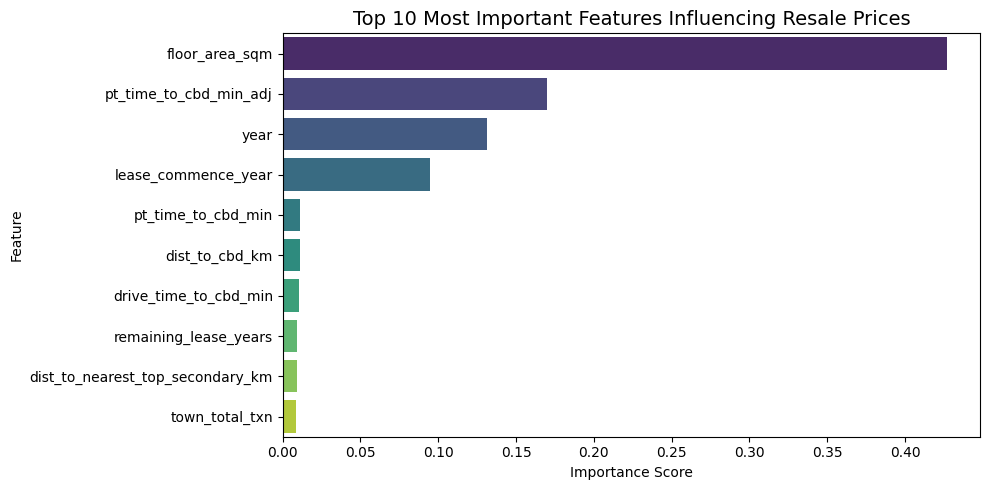

In [189]:
top10 = df_imp.head(10)

plt.figure(figsize=(10,5))
sns.barplot(data=top10, x='importance', y='feature', hue = 'feature', palette='viridis')
plt.title("Top 10 Most Important Features Influencing Resale Prices", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Importance by Category Group

/var/folders/4c/p0l00xkn1hj_9p7q0ptzsjrh0000gn/T/ipykernel_1197/1860985343.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


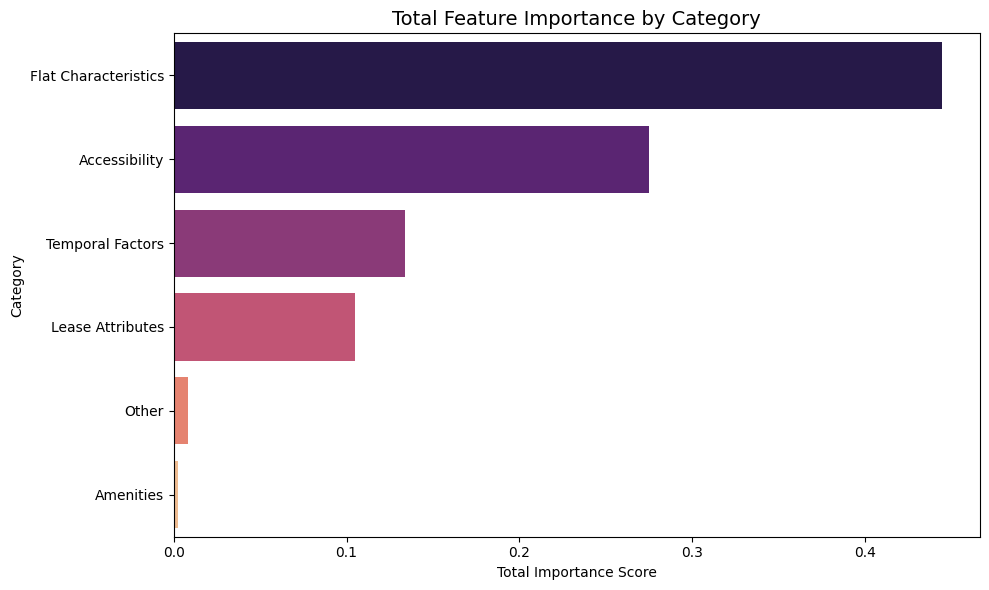

In [198]:
# Create simple feature categories based on naming patterns
def assign_category(x):
    x = x.lower()

    # Accessibility-related keywords
    access_keywords = ['cbd', 'mrt', 'pt_', 'bus', 'drive', 'dist', 'time', 'town', 'district']
    if any(k in x for k in access_keywords):
        return 'Accessibility'

    # Amenities-related keywords
    amenities_keywords = ['mall', 'school', 'pri', 'sec', 'park', 'hospital', 'clinic', 'hawker', 'amen']
    if any(k in x for k in amenities_keywords):
        return 'Amenities'

    # Flat characteristics
    flat_keywords = ['flat', 'floor', 'sqm', 'area', 'room', 'storey']
    if any(k in x for k in flat_keywords):
        return 'Flat Characteristics'

    # Lease attributes
    lease_keywords = ['lease', 'commence', 'remaining']
    if any(k in x for k in lease_keywords):
        return 'Lease Attributes'

    # Temporal factors
    if 'year' in x or 'quarter' in x or 'month' in x:
        return 'Temporal Factors'

    # Everything else
    return 'Other'


# --- Apply categories ---
df_imp['category'] = df_imp['feature'].apply(assign_category)

# --- Group and sum ---
category_summary = (
    df_imp.groupby('category')['importance']
          .sum()
          .sort_values(ascending=False)
)

# --- Plot the graph ---
plt.figure(figsize=(10,6))
sns.barplot(
    x=category_summary.values,
    y=category_summary.index,
    palette="magma"
)
plt.title("Total Feature Importance by Category", fontsize=14)
plt.xlabel("Total Importance Score")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

### Category Totals

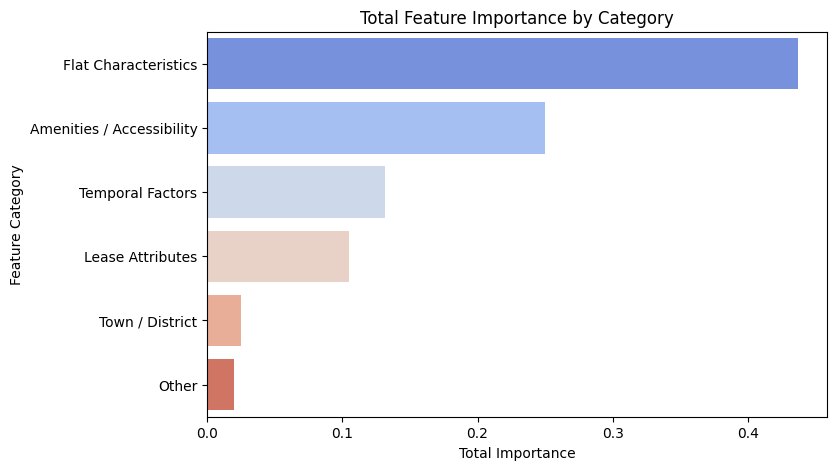

In [192]:
category_summary = df_imp.groupby("category")["importance"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(
    x=category_summary.values,
    y=category_summary.index,
    hue=category_summary.index,   # hue must be defined
    dodge=False,
    legend=False,
    palette="coolwarm"
)
plt.title("Total Feature Importance by Category")
plt.xlabel("Total Importance")
plt.ylabel("Feature Category")
plt.show()

### Cumulative Feature Importance Plot

#### "How Accurately Can These Factors Predict Prices?"

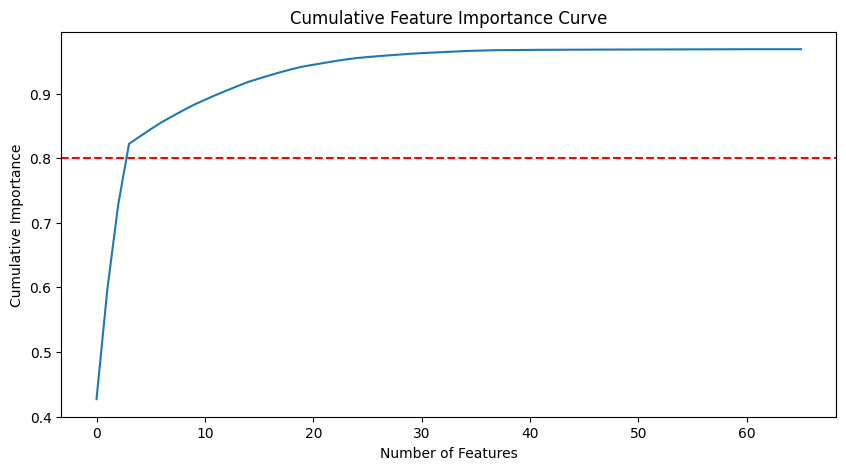

In [193]:
df_imp_sorted = df_imp.sort_values('importance', ascending=False)
df_imp_sorted['cumulative'] = df_imp_sorted['importance'].cumsum()

plt.figure(figsize=(10,5))
plt.plot(df_imp_sorted['cumulative'].values)
plt.axhline(0.80, color='red', linestyle='--')
plt.title("Cumulative Feature Importance Curve")
plt.xlabel("Number of Features")
plt.ylabel("Cumulative Importance")
plt.show()

### Category - Level % Contribution Chart
#### "Which Types of Attributes Matter More - Physical Size, Accessibility, or Lease Attributes?"

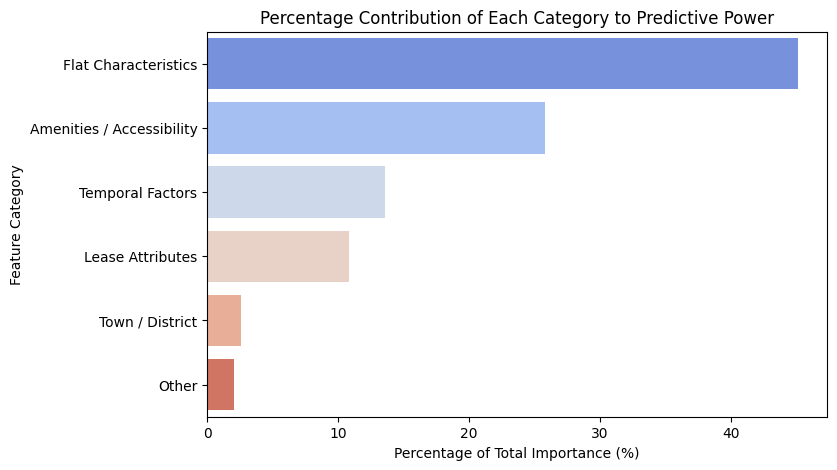

In [194]:
cat_pct = (category_summary / category_summary.sum()) * 100

plt.figure(figsize=(8,5))
sns.barplot(
    x=cat_pct.values,
    y=cat_pct.index,
    hue=cat_pct.index,      # required to avoid seaborn deprecation warning
    legend=False,
    dodge=False,
    palette="coolwarm"
)
plt.title("Percentage Contribution of Each Category to Predictive Power")
plt.xlabel("Percentage of Total Importance (%)")
plt.ylabel("Feature Category")
plt.show()

### Correlation Between Feature Importance & Actual Prices

#### Show Which Features Are Both High Importance and Highly Correlated With Resale Price

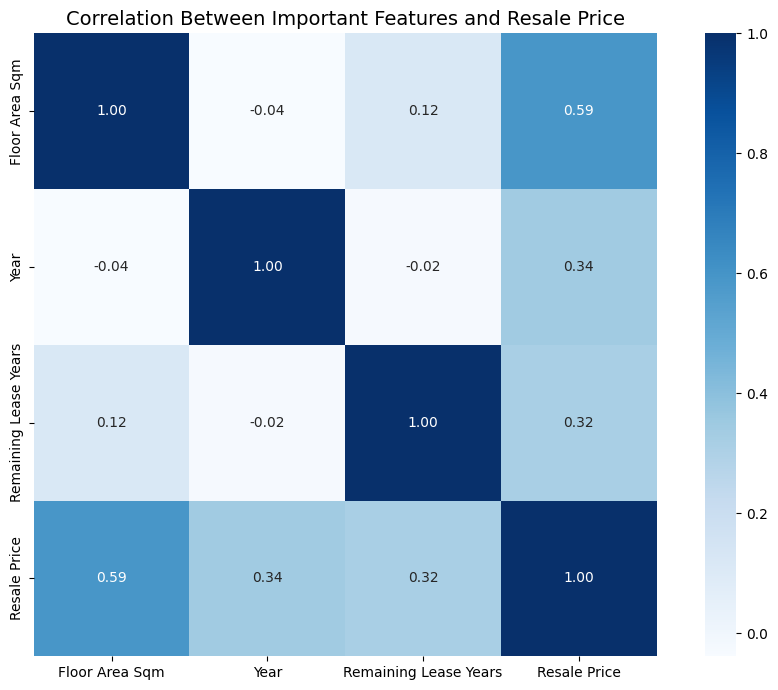

In [195]:
# Load data engineered dataset
df = pd.read_csv("HDB_Resale_Prices_Data_Engineered.csv")

# Remove resale_price if it appears as a feature
df_imp = df_imp[df_imp['feature'] != 'resale_price']

# Top 10 most important features from feature importances CSV
top_features = df_imp.head(10)['feature'].tolist()

# Check which of these exist in the engineered dataset
available_features = [f for f in top_features if f in df.columns]
missing_features   = [f for f in top_features if f not in df.columns]

# Build a subset using only features that exist + resale_price
corr_subset = df[available_features + ['resale_price']]

# Correlation matrix
corr_matrix = corr_subset.corr()

# Correlation values with resale_price (sorted)
corr_with_price = corr_matrix['resale_price'].sort_values(ascending=False)
corr_with_price

# Prettify labels
label_map = {col: col.replace('_', ' ').title() for col in corr_matrix.columns}
label_map['resale_price'] = 'Resale Price'   # custom rename

corr_matrix_pretty = corr_matrix.rename(index=label_map, columns=label_map)

# Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(
    corr_matrix_pretty, 
    annot=True, 
    cmap='Blues', 
    fmt=".2f", 
    square=True
)
plt.title("Correlation Between Important Features and Resale Price", fontsize=14)
plt.tight_layout()
plt.show()